# Lab Group FSP5, Project Group FSP5T03

| Name                | User Name | Student ID |  
| :-----------------: | :-------: | :--------: |   
| Chan Si Min, Rachel | rchan016  | U1920208D  |
| Isaac Soh Wei Yang  | isoh002   | U1921383L  |
| Lim Yi Keong        | ylim149   | U1923011C  |
| Tan Jun Hong        | b190013   | U1920048B  |

### References
> https://www.kaggle.com/ddmngml/exploring-aviation-data  
> https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/  
> https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/  
> https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/  
> https://www.youtube.com/watch?v=hOrHmTgs1_g  
> https://www.kaggle.com/yunusulucay/animation-of-aviation-accident-1982-2018  
> https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial  

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  
> Plotnine : Implementation of a Grammar of Graphics in Python, based on ggplot2 in R  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotnine as p9

Set the default Seaborn style for graphics.

In [2]:
sb.set()

---

## Setup : Import the Dataset

Dataset from Kaggle : **Aviation Accident Database & Synopses**      
Source: https://www.kaggle.com/khsamaha/aviation-accident-database-synopses

The dataset is `aviationData.csv`; hence we use the `read_csv` function from Pandas. We use `info` to check basic information.

In [3]:
aviationData = pd.read_csv(filepath_or_buffer = 'aviationData.csv', engine = 'python')
aviationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84262 entries, 0 to 84261
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                84262 non-null  object 
 1   Investigation.Type      84257 non-null  object 
 2   Accident.Number         84262 non-null  object 
 3   Event.Date              84262 non-null  object 
 4   Location                84185 non-null  object 
 5   Country                 83755 non-null  object 
 6   Latitude                30163 non-null  float64
 7   Longitude               30154 non-null  float64
 8   Airport.Code            47723 non-null  object 
 9   Airport.Name            50439 non-null  object 
 10  Injury.Severity         84262 non-null  object 
 11  Aircraft.Damage         81553 non-null  object 
 12  Aircraft.Category       27508 non-null  object 
 13  Registration.Number     80412 non-null  object 
 14  Make                    84192 non-null

We take a peek of the data.

In [4]:
aviationData.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,08/01/2020
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,02/01/2020
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
4,20191228X62945,NaN,WPR20CA053,2019-12-28,"Missoula, MT",United States,NaN,NaN,MSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,03/01/2020


10% for preparing the dataset to suit your specific problem definition
---

## Clean the Dataset

Once we are done with the importation of data, it's time to *clean* and *tidy-up* the dataset.

Create a copy of the Dataset.

In [5]:
aviationData_clean = aviationData.copy()

###  Upper Case
Firstly, we convert all data to upper case to standardize.

In [6]:
aviationData_clean = aviationData_clean.applymap(lambda x: x.upper() if type(x) == str else x)

### Year, Month and Date
We use Event Date to create columns Year, Month and Day.

In [7]:
aviationData_clean['Year'] = pd.DatetimeIndex(data = aviationData_clean['Event.Date']).year
aviationData_clean['Month'] = pd.DatetimeIndex(data = aviationData_clean['Event.Date']).month
aviationData_clean['Date'] = pd.DatetimeIndex(data = aviationData_clean['Event.Date']).day

### Injuries
We fill all null values with 0. Then, we create columns injuries, which is the total number fatal, series and minor injuries.

In [8]:
injuries_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
for var in injuries_columns:
    aviationData_clean[var].fillna(value = 0, inplace = True)
    
injuries_columns.append('Total.Uninjured')
    
aviationData_clean['Injuries'] = aviationData_clean['Total.Fatal.Injuries'] + aviationData_clean['Total.Serious.Injuries'] + aviationData_clean['Total.Minor.Injuries']

### Amateur Built
We create a list of non-amateur makes, and then fix the amateur built. For example, if there is a make that is labelled 'No' in Amaetuer Built, the subsequent same make will also be labelled 'No' in Amaetuer Built.

In [9]:
non_amateurs = [x for x in aviationData_clean['Make'][aviationData_clean['Amateur.Built'] == 'NO'].unique()]

def fix_amateur_built(amateurBuilt = 'YES', make = None):
    return amateurBuilt if type(amateurBuilt) == str else 'NO' if make in non_amateurs else 'YES'
        
aviationData_clean['Amateur.Built'] = aviationData_clean.apply(func = lambda x: fix_amateur_built(amateurBuilt = x['Amateur.Built'], make = x['Make']), axis = 1)

### Aircraft Category
Using the same logic, we fix aircraft category. We replace the aircraft category with the mode of the same model

In [10]:
aircraft_categories = {}
for var in aviationData_clean['Model'].unique():
    modeVar = aviationData_clean['Aircraft.Category'][aviationData_clean['Model'] == var].mode()
    aircraft_categories[var] = 'UNKNOWN' if modeVar.empty else modeVar[0] 

def fix_aircraft_category(aircraftCategory = 'AIRPLANE', model = None):
    return aircraftCategory if type(aircraftCategory) == str else aircraft_categories[model]

aviationData_clean['Aircraft.Category'] = aviationData_clean.apply(func = lambda x: fix_aircraft_category(aircraftCategory = x['Aircraft.Category'], model = x['Model']), axis = 1)

### Engine Type
Using the same logic, we fix engine type. We replace the engine type with the mode of the same model

In [11]:
def fix_engine_type(engineType = None, model = None):
    if type(engineType) == str:
        return engineType
    else:
        e = (aviationData_clean['Engine.Type'][aviationData_clean['Model'] == model].mode())
        return 'UNKNOWN' if e.empty else e[0]

aviationData_clean['Engine.Type'] = aviationData_clean.apply(func = lambda x: fix_engine_type(engineType = x['Engine.Type'], model = x['Model']), axis = 1)

### Number of Engines
Using the same logic, we fix number of engines. But firsly, we replace rows that are both null values and balloons with 0. Then We replace the number of engines with the mean of the make's engine. Finally, we replace the remaining null values with 1.

In [12]:
def fix_number_of_engines(numberOfEngines = 1, make = None):
    return numberOfEngines if numberOfEngines >= 0 else np.round(a = aviationData_clean['Number.of.Engines'][aviationData_clean['Make'] == make].mean())

aviationData_clean.loc[aviationData_clean['Number.of.Engines'].isnull() & (aviationData_clean['Make'].str.contains(pat = 'BALLOON')), 'Number.of.Engines'] = 0.0
aviationData_clean['Number.of.Engines'] = aviationData_clean.apply(func = lambda x: fix_number_of_engines(numberOfEngines = x['Number.of.Engines'], make = x['Make']), axis = 1)
aviationData_clean['Number.of.Engines'].fillna(value = 1, inplace = True)

### The Rest

We replace Null values with Unknown for non-numeric data with the following exception:

> **Country** : We replace Null values with Foreign as accidents do not happen on land.  

We respect the format of the data, by using **UNK** or **UNKNOWN** where applicable.

In [13]:
replace_nulls = ['Investigation.Type', 'Location', 'Country', 'Airport.Code', 'Airport.Name', 'Aircraft.Damage', 'Registration.Number', 'Make', 'Model', 'FAR.Description', 'Schedule', 'Purpose.of.Flight', 'Air.Carrier', 'Weather.Condition', 'Broad.Phase.of.Flight']
for var in replace_nulls:
    if var == 'Country':
        aviationData_clean[var].fillna(value = 'FOREIGN', inplace = True)
    elif var == 'Airport.Code' or var == 'Schedule' or var == 'Weather.Condition':
        aviationData_clean[var].fillna(value = 'UNK', inplace = True)
    else:
        aviationData_clean[var].fillna(value = 'UNKNOWN', inplace = True)

### Dtypes
We replace object that are categorical with category, and the rest as follows:
> **Event Date** & **Publication Date** : Replace with datetime64  
> **Amateur Built** : Replace with bool  
> **Number of Engines** : Replace with int64

In [14]:
replace_dtypes = ['Investigation.Type', 'Aircraft.Damage', 'Aircraft.Category', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.Flight', 'Weather.Condition', 'Broad.Phase.of.Flight', 'Report.Status', 'Publication.Date']
for var in replace_dtypes:
    if var == 'Event.Date' or var == 'Publication.Date':
        aviationData_clean[var] = aviationData_clean[var].astype(dtype = np.datetime64)
    elif var == 'Amateur.Built':
        aviationData_clean[var] = aviationData_clean[var].astype(dtype = np.bool)
    elif var == 'Number.of.Engines':
        aviationData_clean[var] = aviationData_clean[var].astype(dtype = np.int64)
    else:
        aviationData_clean[var] = aviationData_clean[var].astype(dtype = 'category')

### Data
After cleansing the data, we take a look the `dtypes` and the number of `null` values for each column.

In [15]:
aviationData_clean.dtypes

Event.Id                          object
Investigation.Type              category
Accident.Number                   object
Event.Date                        object
Location                          object
Country                           object
Latitude                         float64
Longitude                        float64
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.Damage                 category
Aircraft.Category               category
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                       bool
Number.of.Engines                  int64
Engine.Type                     category
FAR.Description                 category
Schedule                        category
Purpose.of.Flight               category
Air.Carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.In

In [16]:
aviationData_clean.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  54099
Longitude                 54108
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.Damage               0
Aircraft.Category             0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
FAR.Description               0
Schedule                      0
Purpose.of.Flight             0
Air.Carrier                   0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured           14589
Weather.Condition             0
Broad.Phase.of.Flight         0
Report.Status                 0
Publication.Date          14315
Year    

We also take a peek of the data.

In [17]:
aviationData_clean.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date,Year,Month,Date,Injuries
0,20200102X82407,ACCIDENT,WPR20CA055,2019-12-31,"ELK, CA",UNITED STATES,39.128611,-123.715833,LLR,LITTLE RIVER,...,0.0,1.0,VMC,TAKEOFF,FACTUAL,2020-01-13,2019,12,31,0.0
1,20191231X83852,ACCIDENT,CEN20FA049,2019-12-31,"OLATHE, KS",UNITED STATES,38.846111,-94.736111,OJC,JOHNSON COUNTY EXECUTIVE,...,0.0,NaN,VMC,TAKEOFF,PRELIMINARY,2020-08-01,2019,12,31,2.0
2,20200102X54844,ACCIDENT,ANC20CA011,2019-12-31,"FAIRBANKS, AK",UNITED STATES,64.666945,-148.133334,UNK,UNKNOWN,...,0.0,2.0,UNK,UNKNOWN,PRELIMINARY,2020-02-01,2019,12,31,0.0
3,20191230X91852,ACCIDENT,CEN20CA048,2019-12-30,"GRANBURY, TX",UNITED STATES,32.365556,-97.645000,UNK,UNKNOWN,...,0.0,1.0,UNK,UNKNOWN,PRELIMINARY,2019-12-31,2019,12,30,0.0
4,20191228X62945,UNKNOWN,WPR20CA053,2019-12-28,"MISSOULA, MT",UNITED STATES,NaN,NaN,MSO,UNKNOWN,...,0.0,NaN,UNK,UNKNOWN,PRELIMINARY,2020-03-01,2019,12,28,0.0


10% for exploratory data analysis / visualization to understand the data
---

## Basic Statistics & Exploratory Analysis

Take a look at some of the statistical descriptions and statistical distributions.

Firsly, let's see how many accidents are there in this data per year.

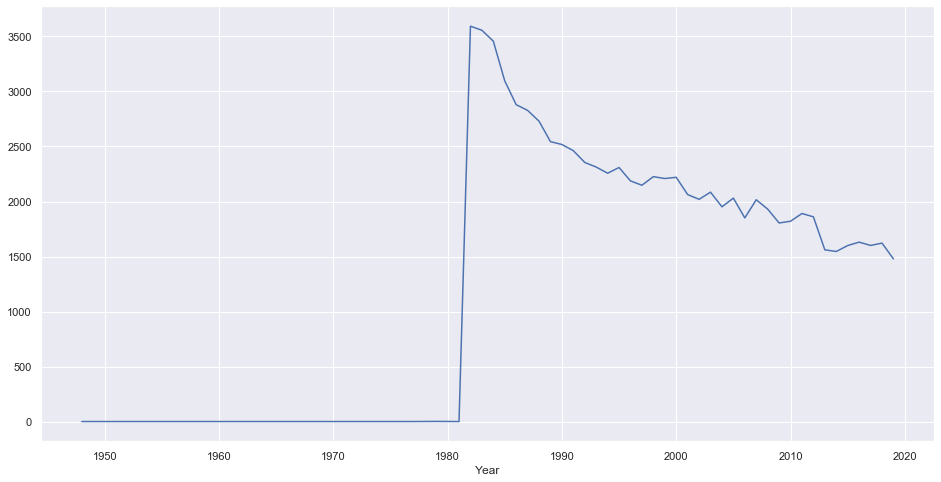

In [18]:
accidents_per_year = aviationData_clean.groupby(by = 'Year').size()
plt.figure(figsize = (16, 8))
accidents_per_year.plot()

After analysing the data, we noticed that there isn't much data before year 1982, we decided to concentrate on the data after year 1982.

In [19]:
aviationData_clean_1982 = aviationData_clean[aviationData_clean['Year'] >= 1982]

We continue to look at the statistical descriptions and statistical distributions. Firstly, we use `describe`.

In [20]:
aviationData_clean_1982.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Month,Date,Injuries
count,30161.000000,30152.000000,84255.000000,84255.000000,84255.000000,84255.000000,69668.000000,84255.000000,84255.000000,84255.000000,84255.000000
mean,37.544765,-93.509477,1.148561,0.573829,0.214088,0.342235,5.901117,1997.995454,6.588950,15.733108,1.130153
std,12.370659,39.455446,0.461177,5.193368,1.116487,2.264483,29.534975,10.997132,3.060404,8.833917,6.101990
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000,1982.000000,1.000000,1.000000,0.000000
25%,33.307778,-114.861111,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000,4.000000,8.000000,0.000000
50%,38.125278,-94.371806,1.000000,0.000000,0.000000,0.000000,1.000000,1997.000000,7.000000,16.000000,0.000000
75%,42.525556,-81.650833,1.000000,0.000000,0.000000,0.000000,2.000000,2007.000000,9.000000,23.000000,1.000000
max,89.218056,179.618611,8.000000,349.000000,111.000000,380.000000,699.000000,2019.000000,12.000000,31.000000,380.000000


We plot the correlation heatmap as well.

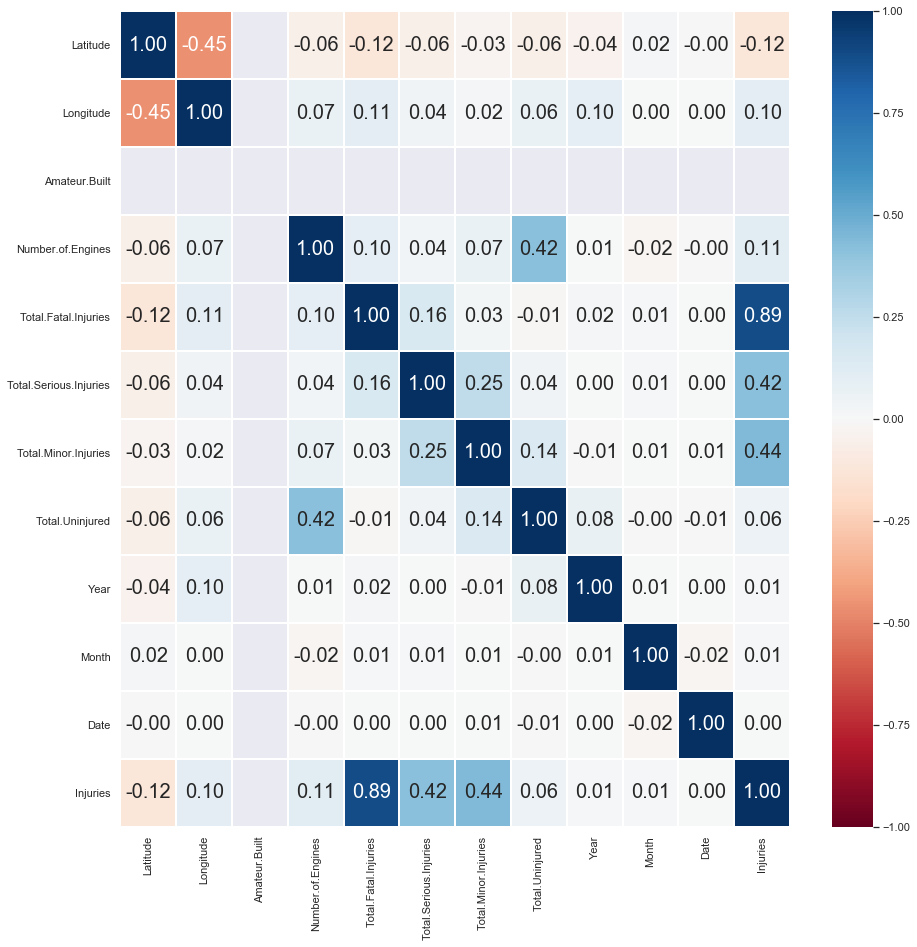

In [21]:
f, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 15))
sb.heatmap(data = aviationData_clean_1982.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = '.2f', annot_kws = {'size': 20}, cmap = 'RdBu')

### Injuries and Accidents
We look at the number of injuries per year.

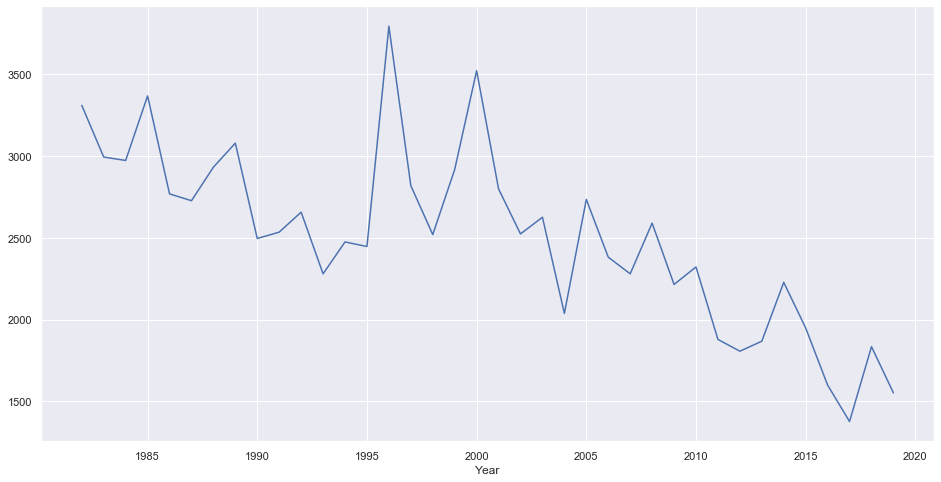

In [22]:
injuries_per_year = aviationData_clean_1982.groupby(by = 'Year')['Injuries'].sum()
plt.figure(figsize = (16, 8))
injuries_per_year.plot()

It looks like the trend is falling...

We take a look at the accidents per month.

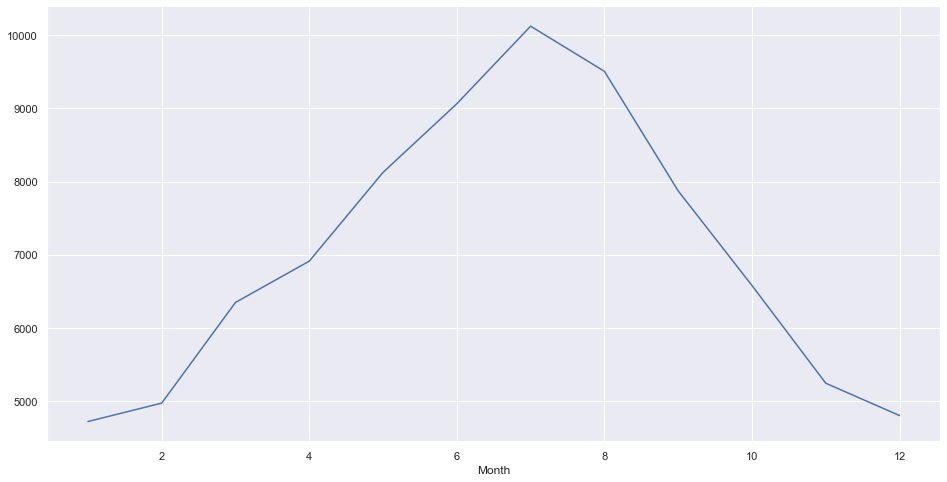

In [23]:
accidents_per_month = aviationData_clean_1982.groupby(by = 'Month').size()
plt.figure(figsize = (16, 8))
accidents_per_month.plot()

July has the most accidents per month. A simple google search online shows that July is the busiest air travel month of the year, while February is the least busiest. As there are more travel, there is bound to be more accidents...

We take a look again at the number of accidents per year.

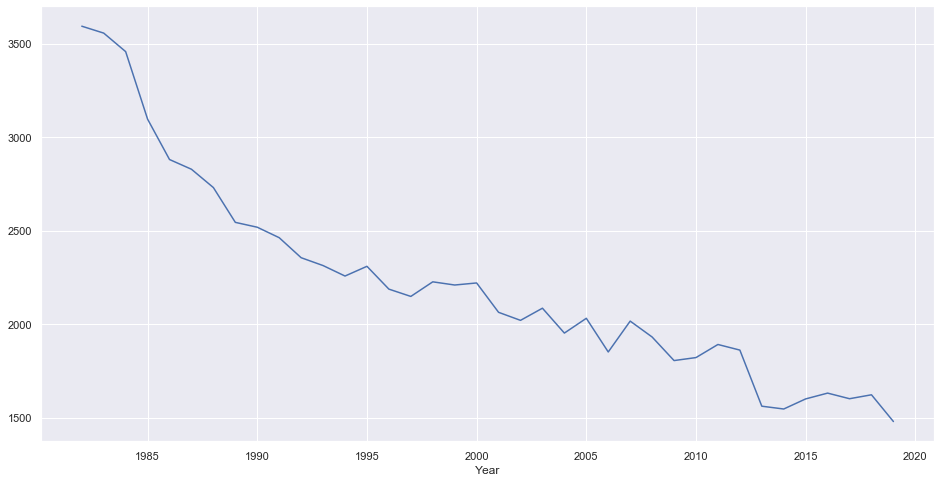

In [24]:
accidents_per_year = aviationData_clean_1982.groupby(by = 'Year').size()
plt.figure(figsize = (16, 8))
accidents_per_year.plot()

The number of accidents is falling.

We take a look at the scatter plot and correlation heatmaps.

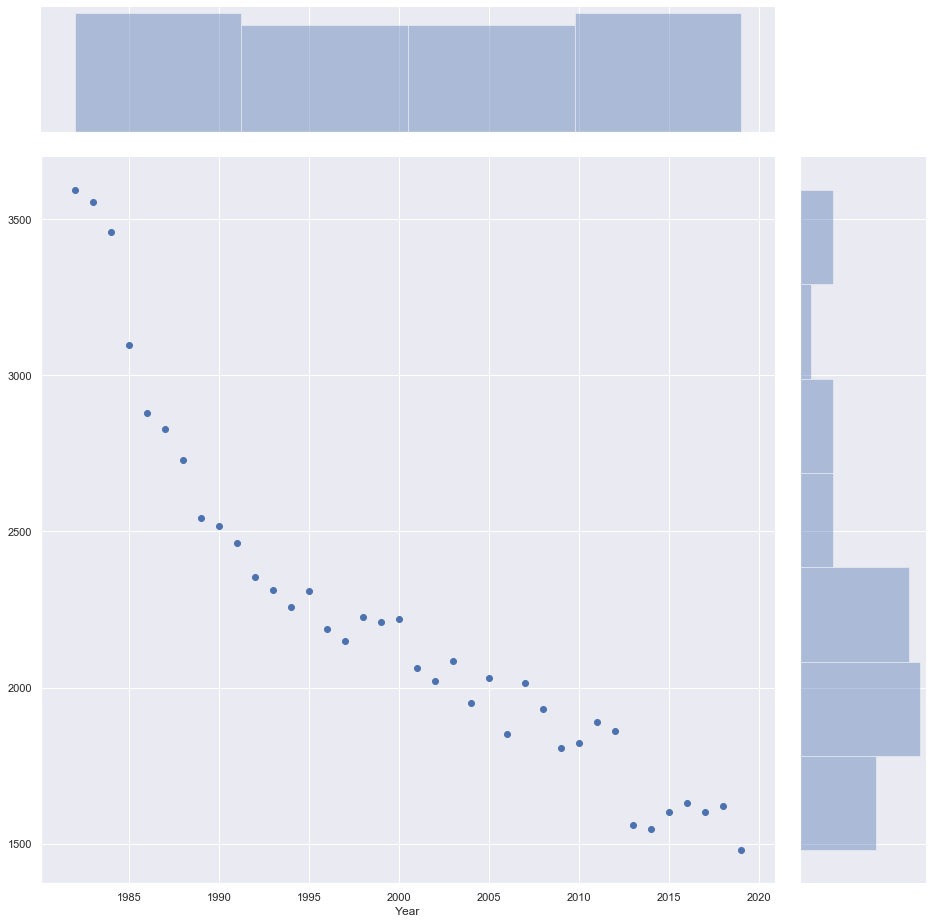

In [25]:
sb.jointplot(x = accidents_per_year.index, y = accidents_per_year, height = 13)

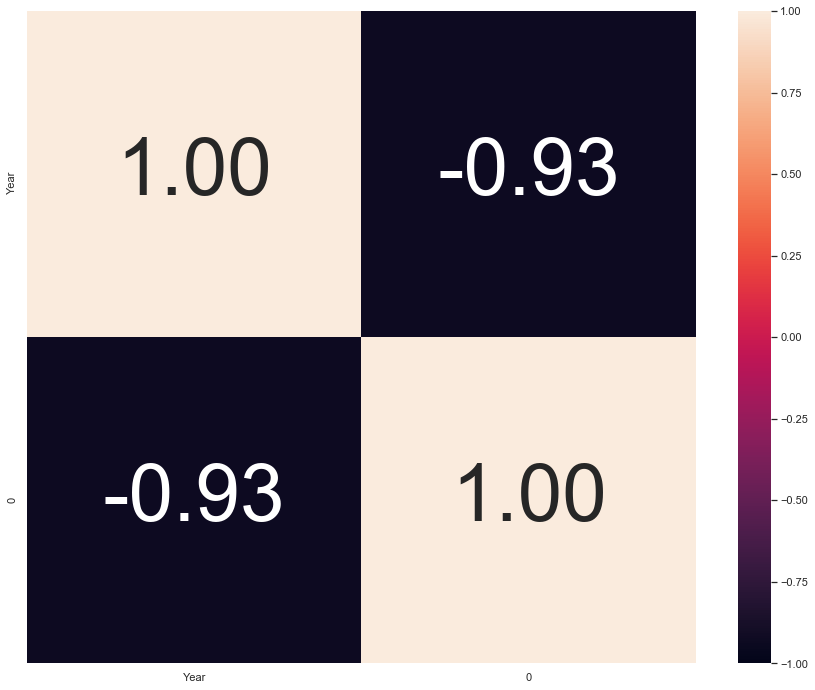

In [26]:
plt.figure(figsize = (15, 12))

jointDF = pd.DataFrame(data = accidents_per_year)
jointDF.reset_index(level = 0, inplace = True)

sb.heatmap(data = jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt='.2f', annot_kws = {'size': 80})

It seems like there is a strong linear relationship, we could probably do linear regression with this!

We group the fatal injuries to see which range has the most amount, and add it as a column to a dataframe. We only consider those with at least one fatality.

In [27]:
aviationData_fatal = aviationData_clean_1982[aviationData_clean_1982['Total.Fatal.Injuries'] > 0]
#aviationData_fatal['Fatal.Range'] = None
fatal_range = []
for i in aviationData_fatal['Total.Fatal.Injuries']:
    if(int(i) >= 1 and int(i) <= 10):
        fatal_range.append('1-10')
    elif(int(i) <= 20):
        fatal_range.append('11-20')
    elif(int(i) <= 30):
        fatal_range.append('21-30')
    elif(int(i) <= 40):
        fatal_range.append('31-40')
    elif(int(i) <= 50):
        fatal_range.append('41-50')
    elif(int(i) <= 60):
        fatal_range.append('51-60')
    elif(int(i) <= 70):
        fatal_range.append('61-70')
    elif(int(i) <= 80):
        fatal_range.append('71-80')
    elif(int(i) <= 90):
        fatal_range.append('81-90')
    elif(int(i) <= 100):
        fatal_range.append('91-100')
    elif(int(i) <= 200):
        fatal_range.append('101-200')
    else:
        fatal_range.append('201-400')
aviationData_fatal.insert(loc = len(aviationData_fatal.columns), column = 'Fatal.Range', value = fatal_range)

We then show the count and the countplot for the ranges.

1-10       16750
11-20         89
101-200       49
21-30         25
201-400       14
41-50         12
31-40         10
81-90         10
71-80         10
61-70          9
51-60          8
91-100         5
Name: Fatal.Range, dtype: int64


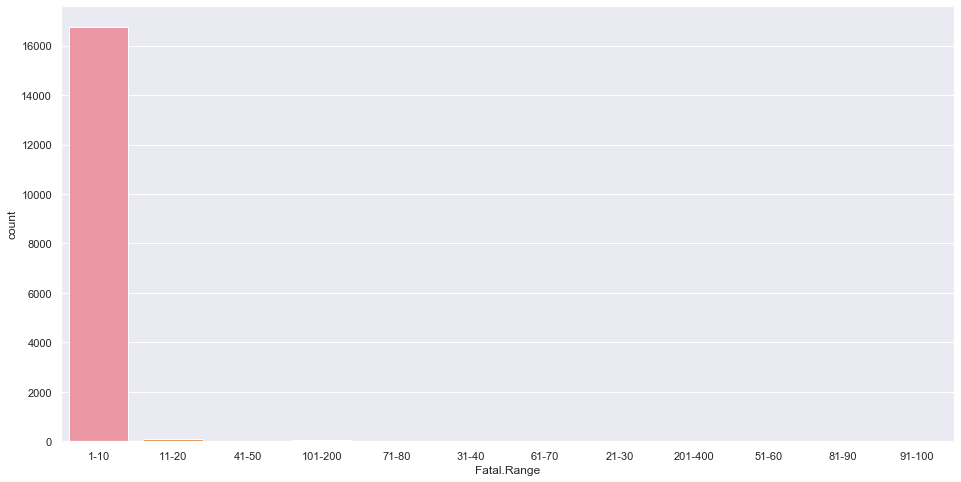

In [28]:
print(aviationData_fatal['Fatal.Range'].value_counts())

plt.figure(figsize = (16, 8))
sb.countplot(x = 'Fatal.Range', data = aviationData_fatal)

We look at the range of 1-10 in more detail.

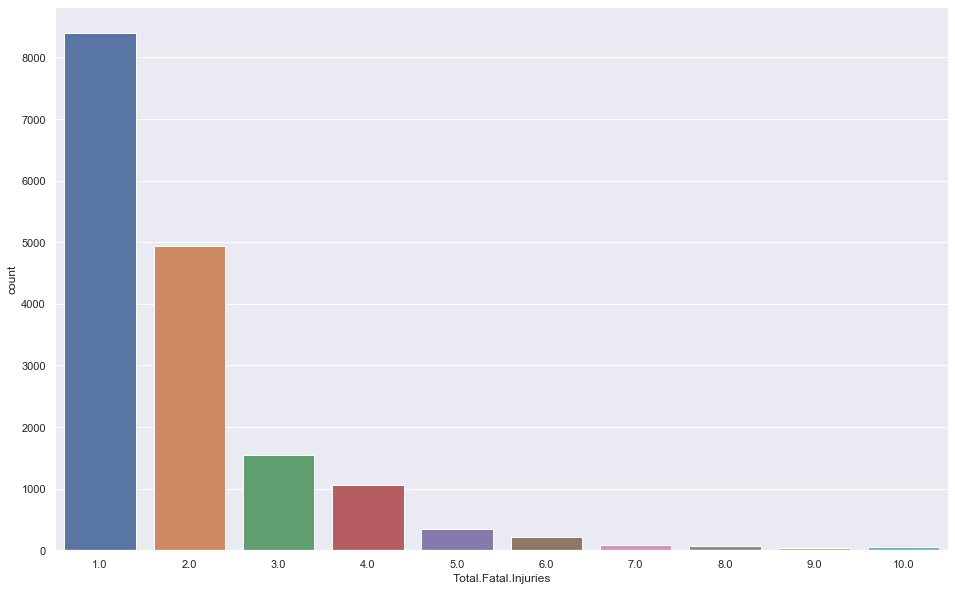

In [29]:
aviationData_fatal1to10 = aviationData_fatal[aviationData_fatal['Total.Fatal.Injuries'] <= 10]
plt.figure(figsize = (16, 10))
sb.countplot(x = 'Total.Fatal.Injuries', data = aviationData_fatal1to10)

### Engine Type
Let's dive in to see the the distribution of engine types with 1 fatality and 2 fatalities, since most accidents have either 1 or 2 fatalities.

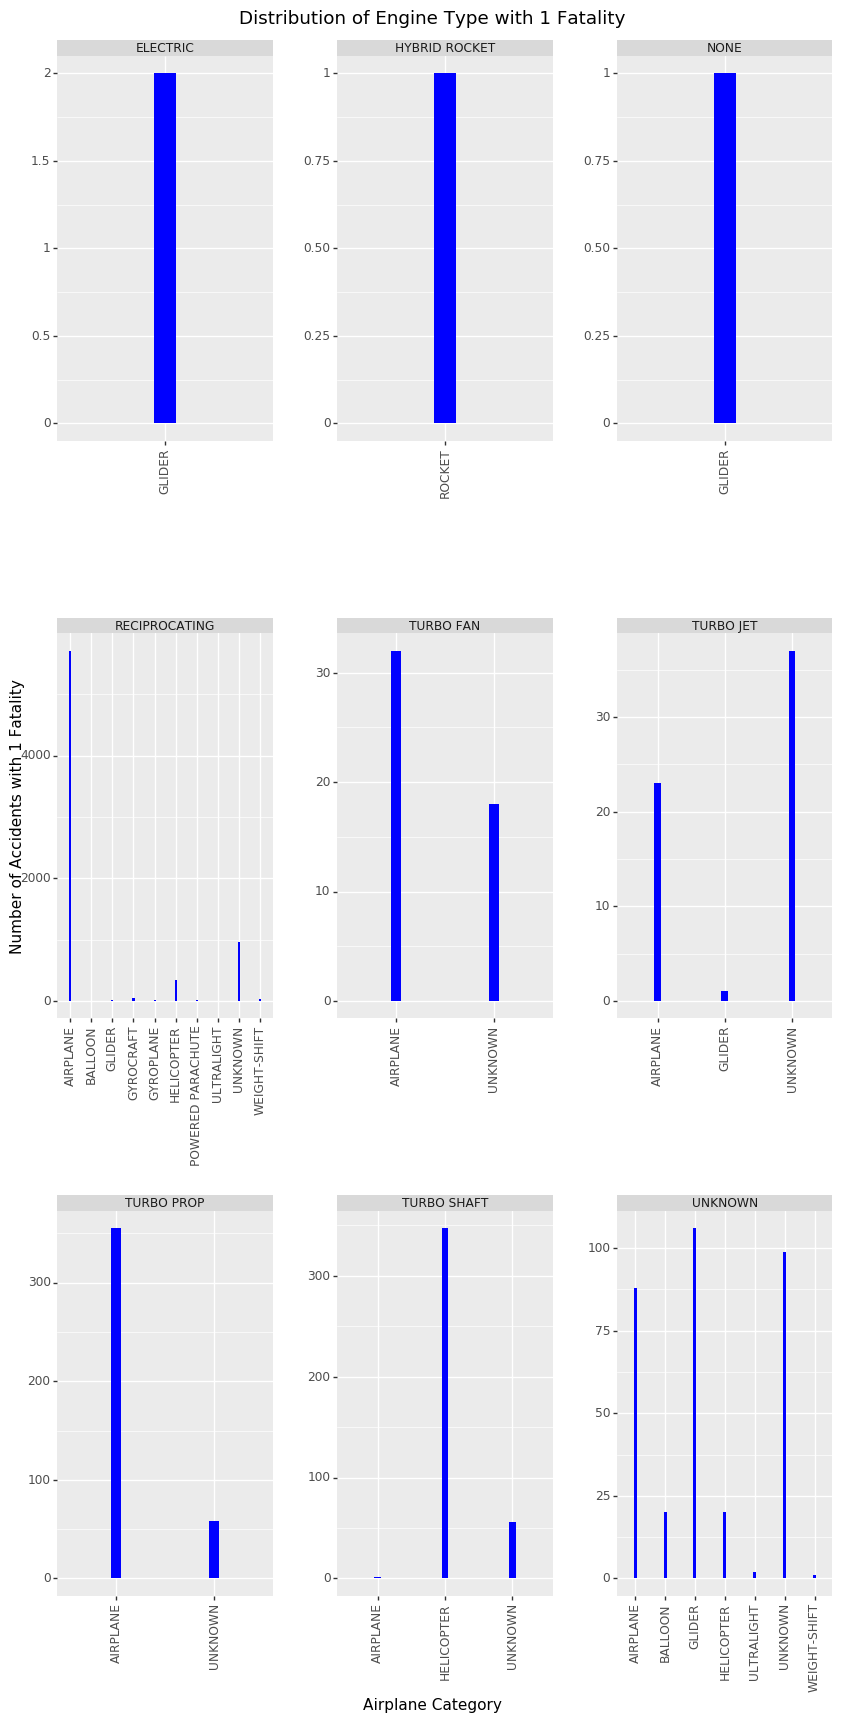

<ggplot: (-9223371853335808984)>

In [30]:
aviationData_fatal1 = aviationData_fatal[aviationData_fatal['Total.Fatal.Injuries'] == 1]
p9.ggplot(aviationData_fatal1, p9.aes(x = 'Aircraft.Category')) + \
p9.geom_bar(fill = 'blue', width = 0.1, size = 40) + \
p9.facet_wrap('Engine.Type', scales = 'free', ncol = 3) + \
p9.theme(subplots_adjust = {'wspace': 0.3, 'hspace': 0.5}, axis_text_x = p9.element_text(angle = 90), figure_size = (10, 20)) + \
p9.labs(title = 'Distribution of Engine Type with 1 Fatality', x = 'Airplane Category', y = 'Number of Accidents with 1 Fatality')

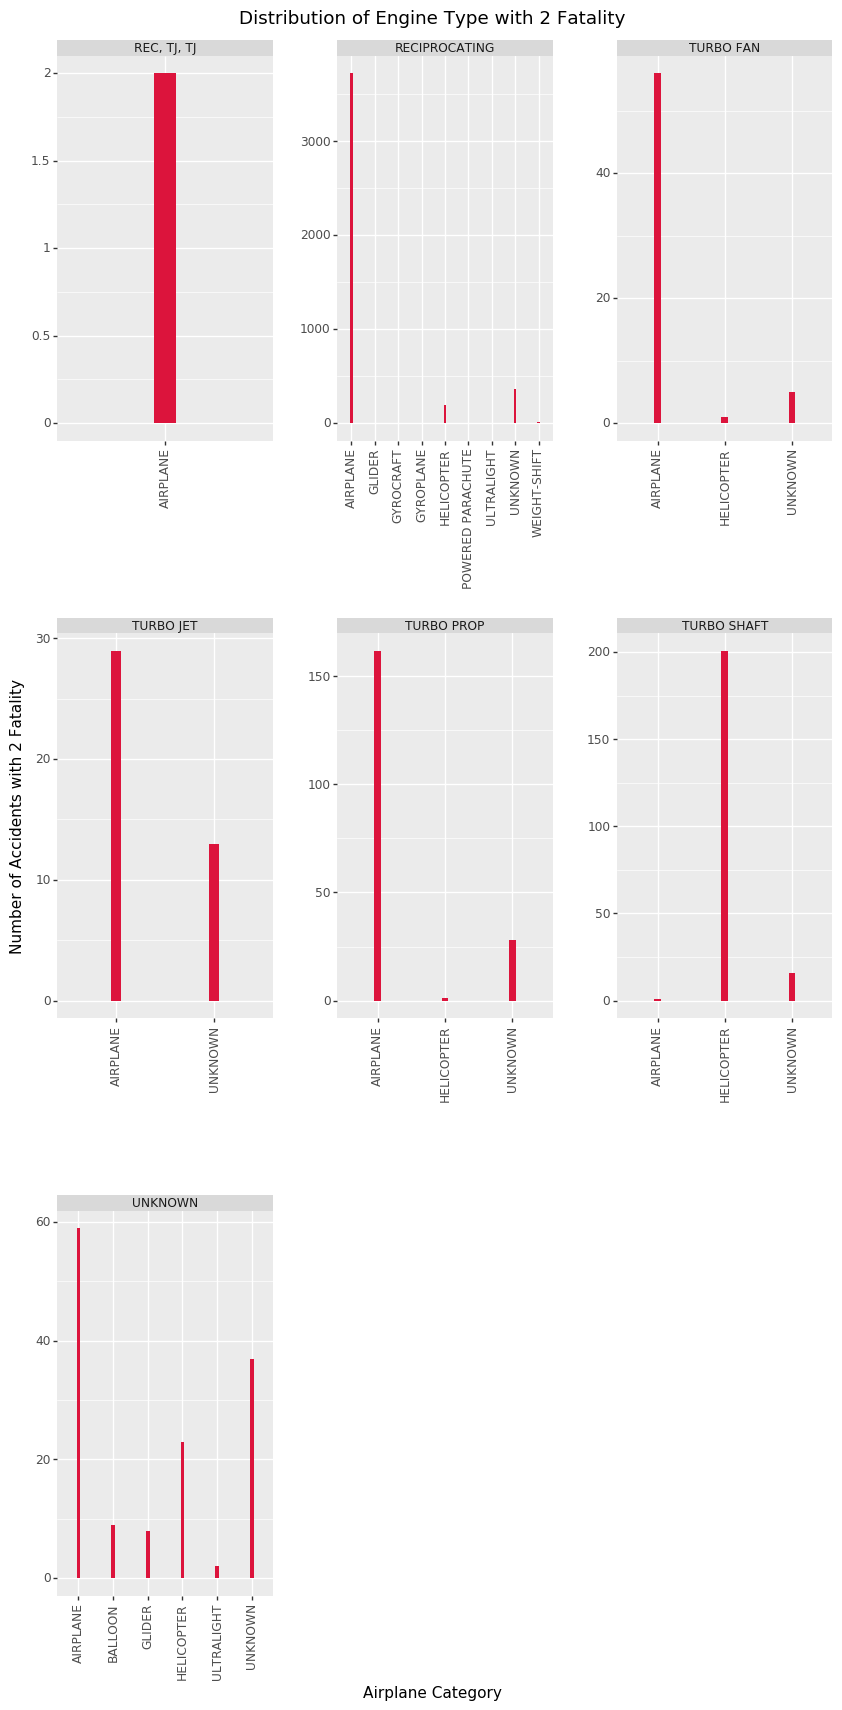

<ggplot: (-9223371853335886284)>

In [31]:
aviationData_fatal2 = aviationData_fatal[aviationData_fatal['Total.Fatal.Injuries'] == 2]
p9.ggplot(aviationData_fatal2, p9.aes(x = 'Aircraft.Category')) + \
p9.geom_bar(fill = 'crimson', width = 0.1, size = 40) + \
p9.facet_wrap('Engine.Type', scales = 'free', ncol = 3) + \
p9.theme(subplots_adjust = {'wspace': 0.3, 'hspace': 0.5}, axis_text_x = p9.element_text(angle = 90), figure_size = (10, 20)) + \
p9.labs(title = 'Distribution of Engine Type with 2 Fatality', x = 'Airplane Category', y = 'Number of Accidents with 2 Fatality')

There is no surprise that airplane constitutes the most fatalities, since more of the data is on airplanes. However, it is interesting to see the other types of airplane categories.

Let's see the distribution of engine type.

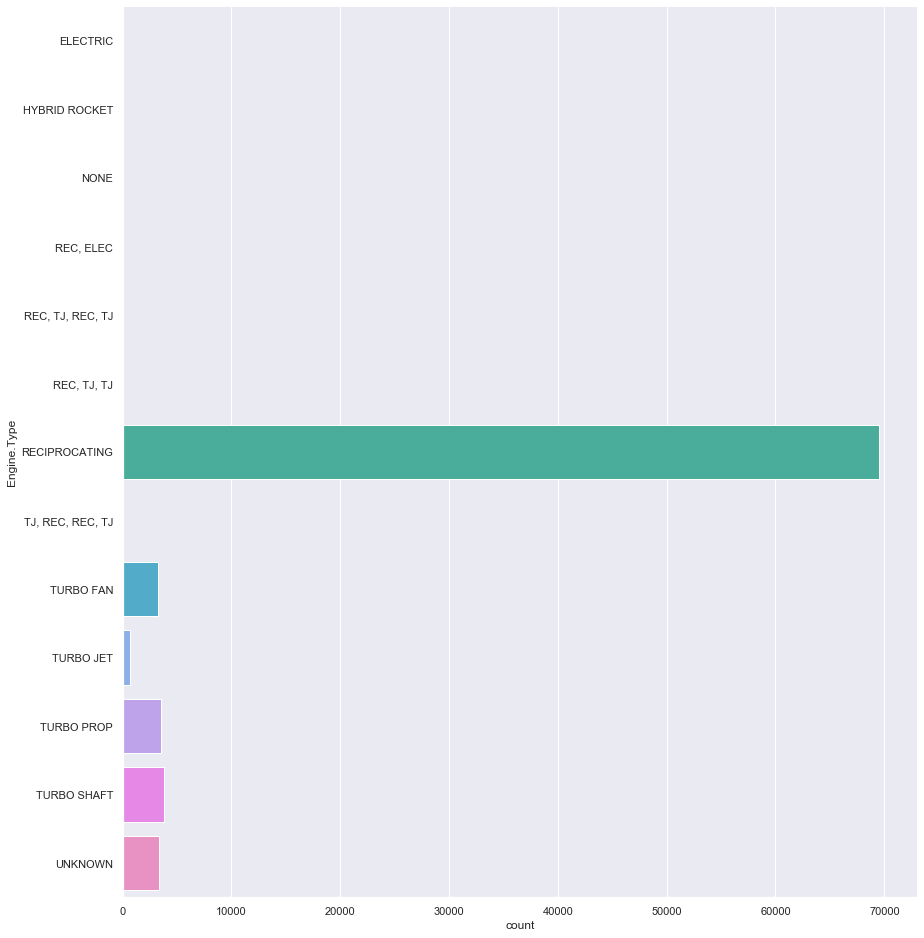

In [32]:
sb.catplot(y = 'Engine.Type', data = aviationData_clean_1982, kind = 'count', height = 13)

According to wikipedia, a reciprocating engine, also often known as a piston engine, is typically a heat engine that uses one or more reciprocating pistons to convert pressure into a rotating motion. It is also what most smaller and older aircraft uses. Largest passenger aircraft uses  mostly jet engines.

To confirm this, we plot the number of accidents with reciprocating engine type and and without.

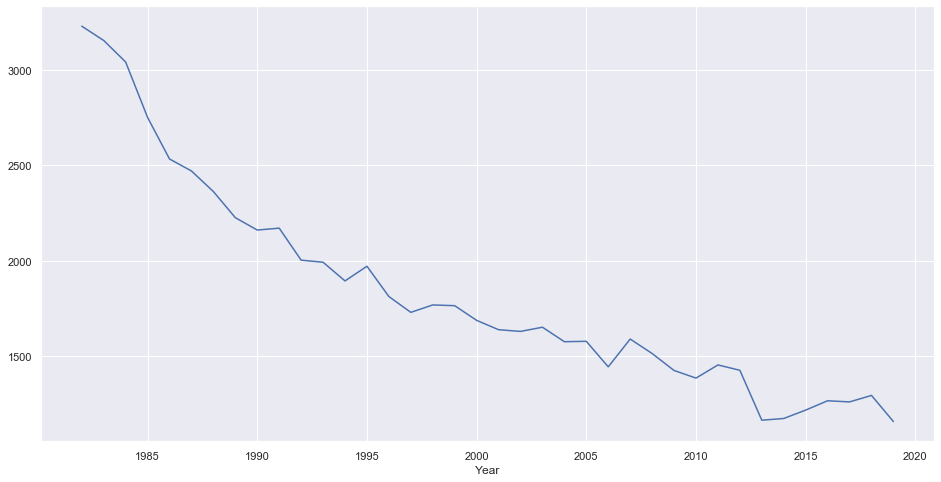

In [33]:
plt.figure(figsize = (16, 8))
aviationData_clean_1982[aviationData_clean_1982['Engine.Type'] == 'RECIPROCATING'].groupby(by = 'Year').size().plot()

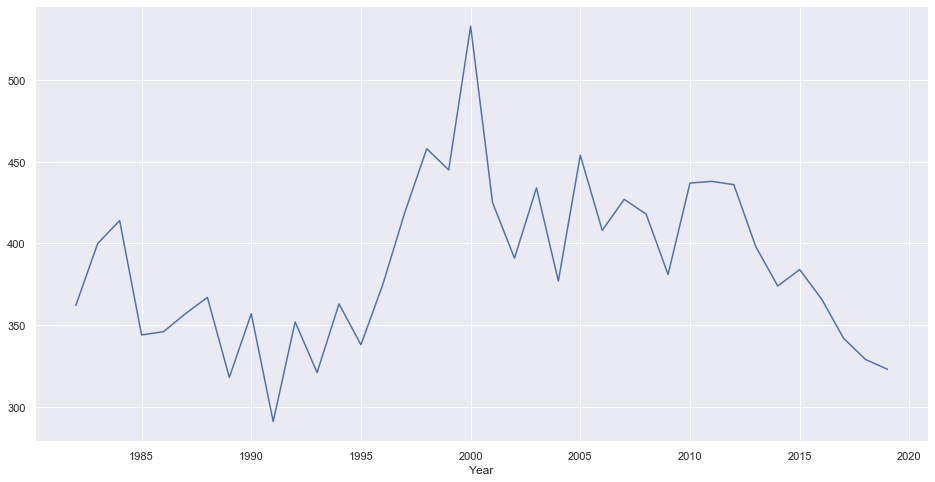

In [34]:
plt.figure(figsize = (16, 8))
aviationData_clean_1982[aviationData_clean_1982['Engine.Type'] != 'RECIPROCATING'].groupby(by = 'Year').size().plot()

As we can see, the number of accidents with reciprocating engine type is decreasing, and the trend is very different for non-reciprocating type.

One reason for this is probably because when the airline industry started to become popular, the technology is not that good yet, so as more people use it, there are more accidents. Then it improved at a much faster rate than the increase in market share, which is why the accidents rate started to fall.

We take a look of the distribution of engine type with reciprocating.

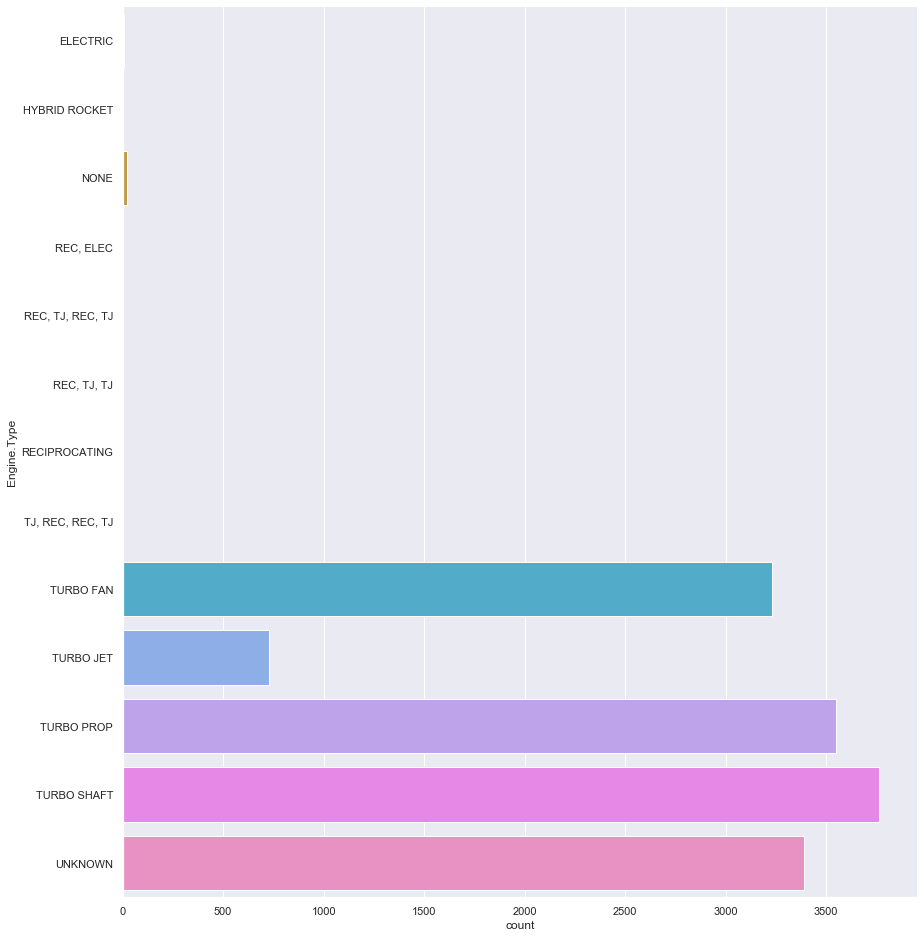

In [35]:
sb.catplot(y = 'Engine.Type', data = aviationData_clean_1982[aviationData_clean_1982['Engine.Type'] != 'RECIPROCATING'], kind = 'count', height = 13)

### Weather Conditions
Let's take a look at weather conditions

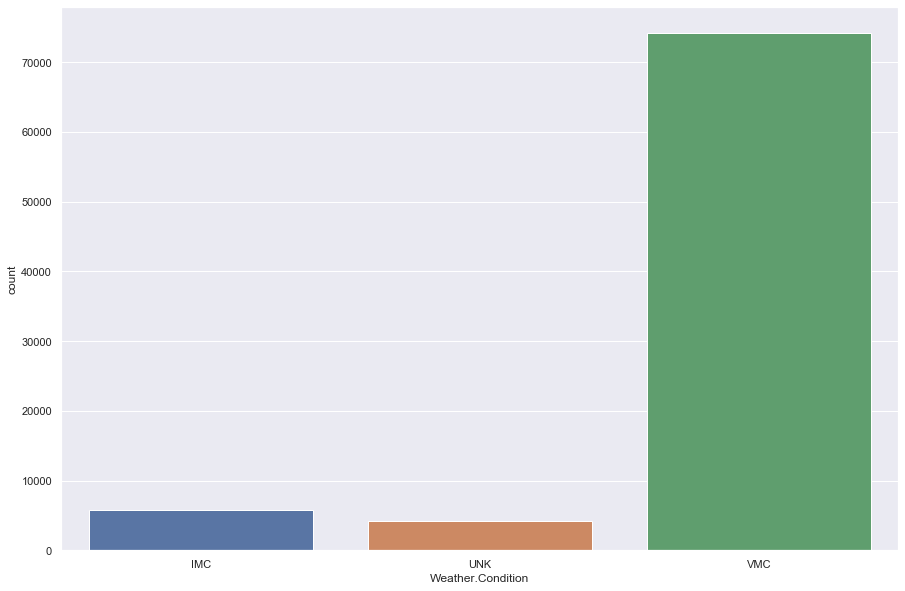

In [36]:
plt.figure(figsize = (15 , 10))
sb.countplot(x = 'Weather.Condition', data = aviationData_clean_1982)

According to wikipedia, visual meteorological conditions (VMC) is an aviation flight category in which visual flight rules (VFR) flight is permitted—that is, conditions in which pilots have sufficient visibility to fly the aircraft maintaining visual separation from terrain and other aircraft. 
Instrument meteorological conditions (IMC), on the other hand is an aviation flight category that describes weather conditions that require pilots to fly primarily by reference to instruments, and therefore under instrument flight rules (IFR), rather than by outside visual references under visual flight rules (VFR).
In other words, VMC means that the pilots can see what is going on outside the aircraft, while IMC means that pilot can only rely on instruments to determine the aircrafts' speed, altitude etc.

We plot to see which engine and weather condition leads to the most accidents.

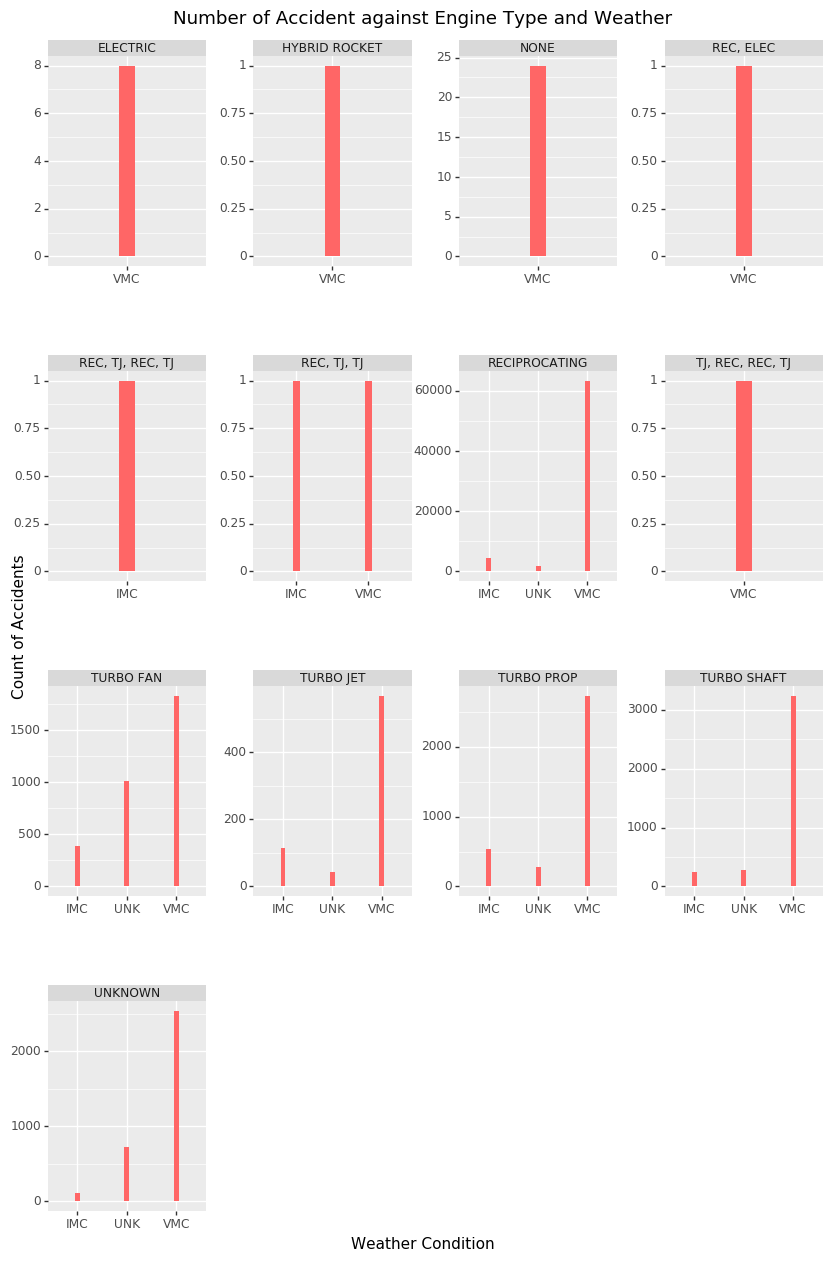

<ggplot: (-9223371853335951044)>

In [37]:
p9.ggplot(aviationData_clean_1982, p9.aes(x = 'Weather.Condition')) + \
p9.geom_bar(fill = '#FF6666', width = 0.1, size = 40) + \
p9.facet_wrap('Engine.Type', scales = 'free', ncol = 4) + \
p9.theme(subplots_adjust = {'wspace': 0.3, 'hspace': 0.5}, axis_text_x = p9.element_text(angle = 0), figure_size = (10, 15)) + \
p9.labs(title = 'Number of Accident against Engine Type and Weather', x = 'Weather Condition', y = 'Count of Accidents')

### Broad Phase of Flight
We take a look at the number of accidents in the broad phase of flight.

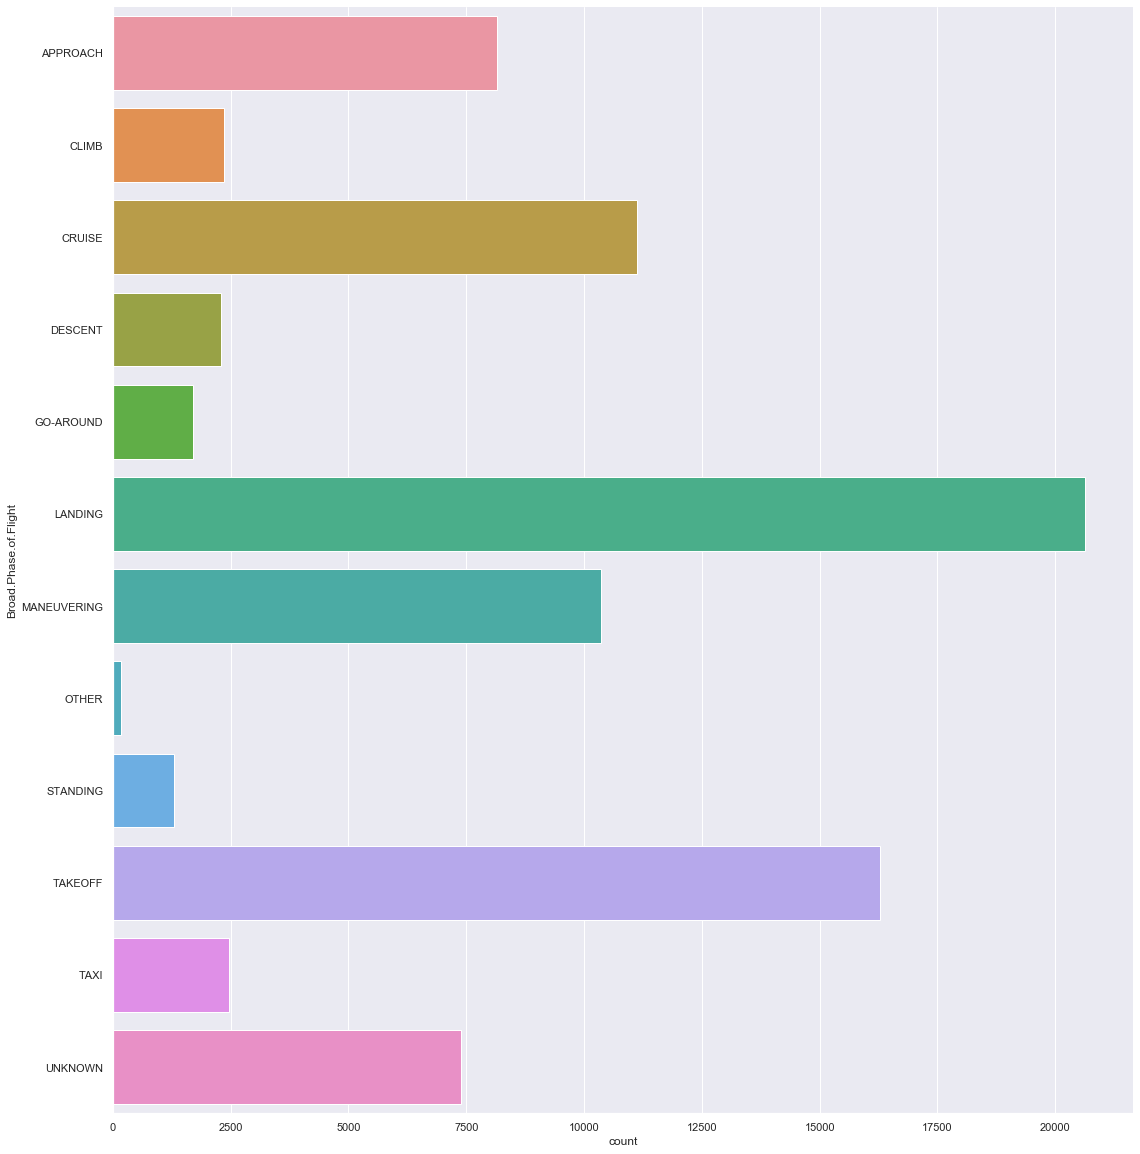

In [38]:
sb.catplot(y = 'Broad.Phase.of.Flight', data = aviationData_clean_1982, kind = 'count', height = 16)

A large number of accidents take place during landing and takeoff, which is why flight attendants ask us to put on our seat belts...

### Make and model

We group make and models, and see which make has the most models in the data.

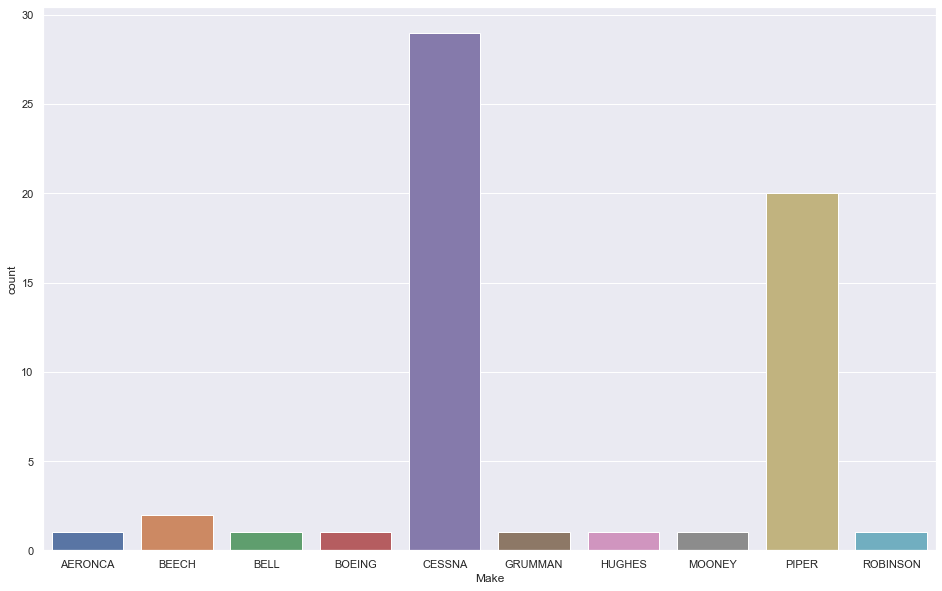

In [39]:
make_model = aviationData_clean_1982.groupby(['Make', 'Model']).size().reset_index(name='Frequency')
make_model = make_model.loc[(make_model['Make'] != 'UNKNOWN') & (make_model['Model'] != 'UNKNOWN')]

f, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 10))
sb.countplot(x = 'Make', data = make_model[make_model['Frequency'] > 200])

There are almost 30 Cessna models, which is far more than familiar brands like boeing.

### Longitude and latitude
Plot the jointplot of longitude and latitude.

<Figure size 1080x864 with 0 Axes>

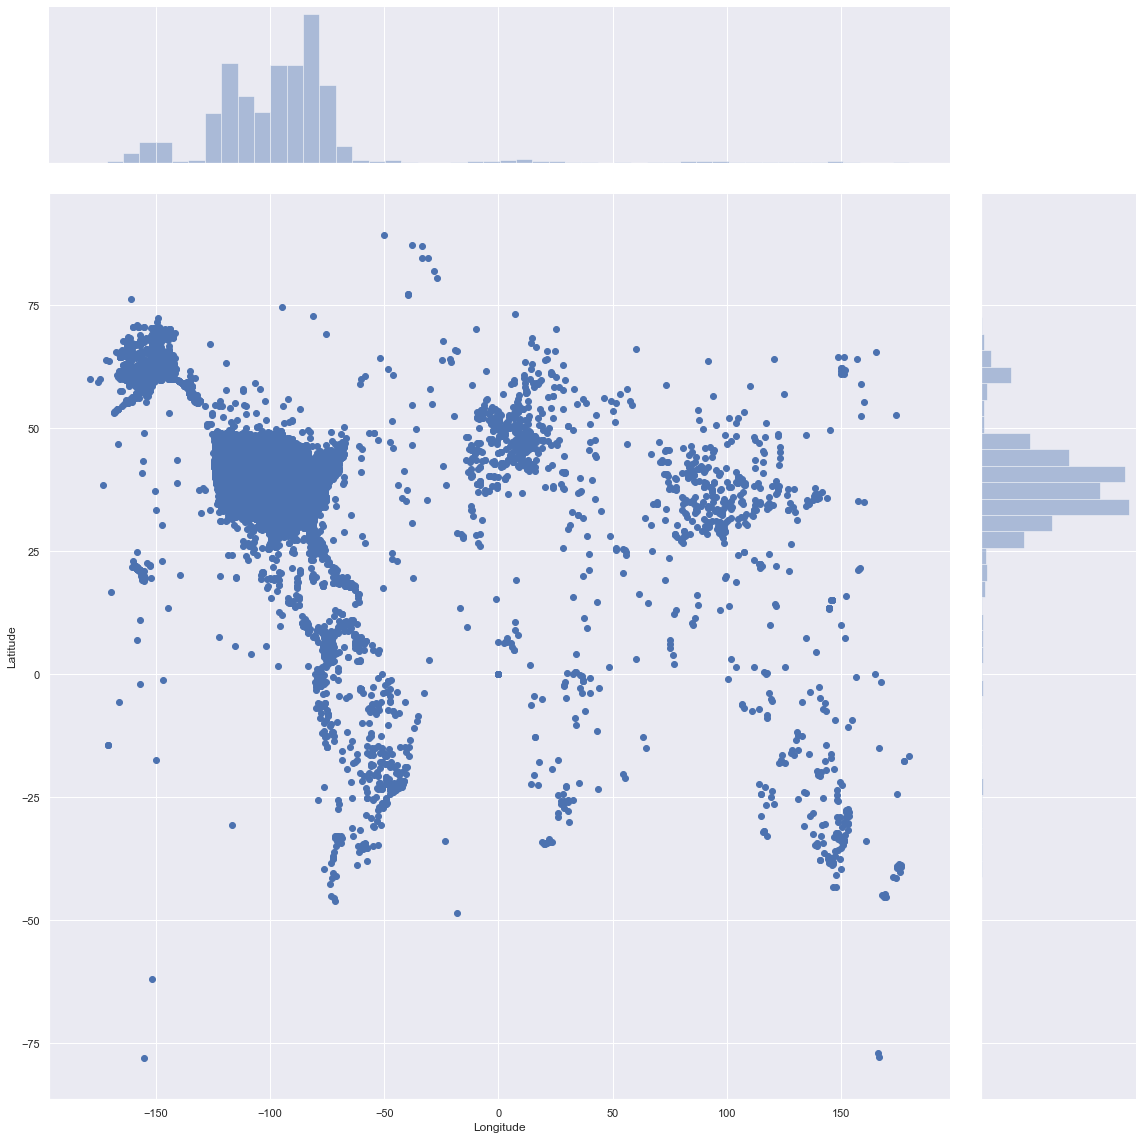

In [40]:
plt.figure(figsize = (15, 12))
sb.jointplot(x = 'Longitude', y = 'Latitude', data = aviationData_clean_1982, height = 16)

We can see that it resembles a world map, with most of the accidents happening in the United States and Europe.

### Fatalities
We do a box plot to see the fatalities trend.

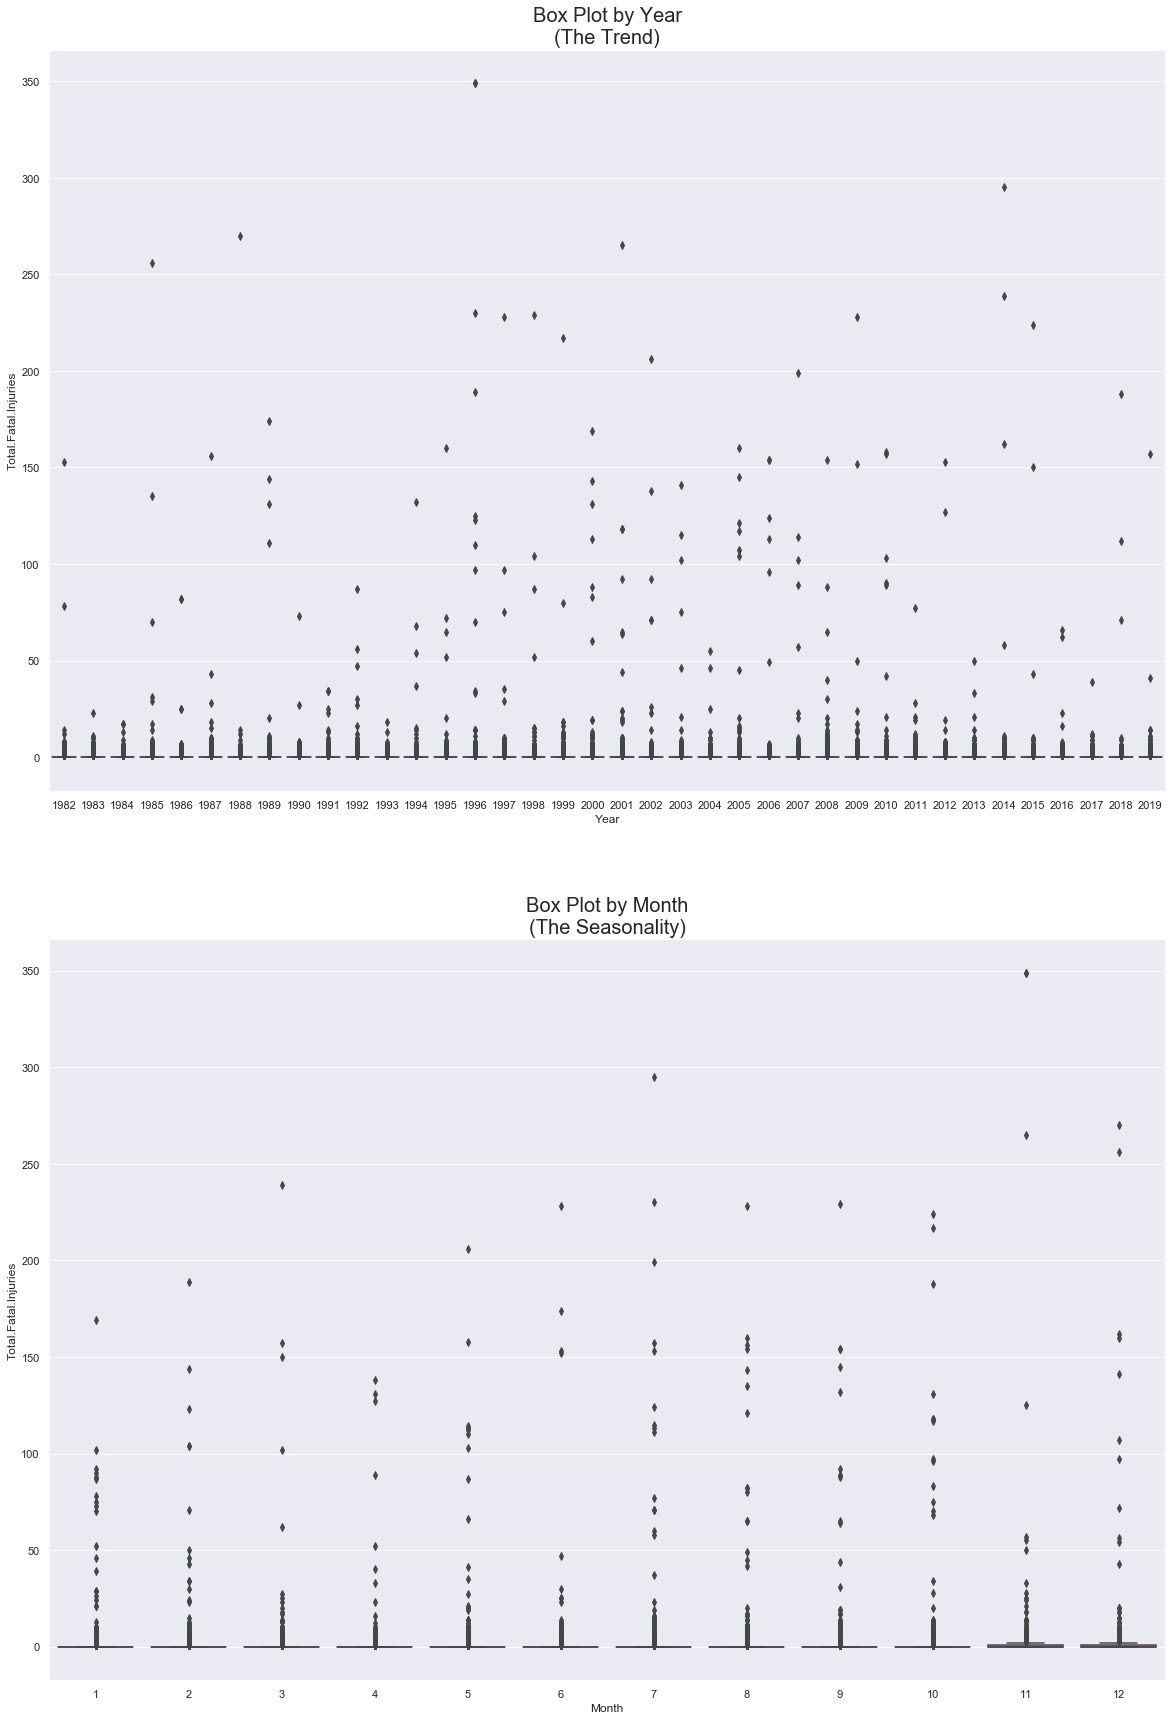

In [41]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 30))

sb.boxplot(x = 'Year', y = 'Total.Fatal.Injuries', data = aviationData_clean_1982, ax = axes[0])
sb.boxplot(x = 'Month', y = 'Total.Fatal.Injuries', data = aviationData_clean_1982, ax = axes[1])
axes[0].set_title(label = 'Box Plot by Year\n(The Trend)', fontsize = 20); 
axes[1].set_title(label = 'Box Plot by Month\n(The Seasonality)', fontsize = 20)
plt.show()

Perhaps a bar graph will show the trend better...

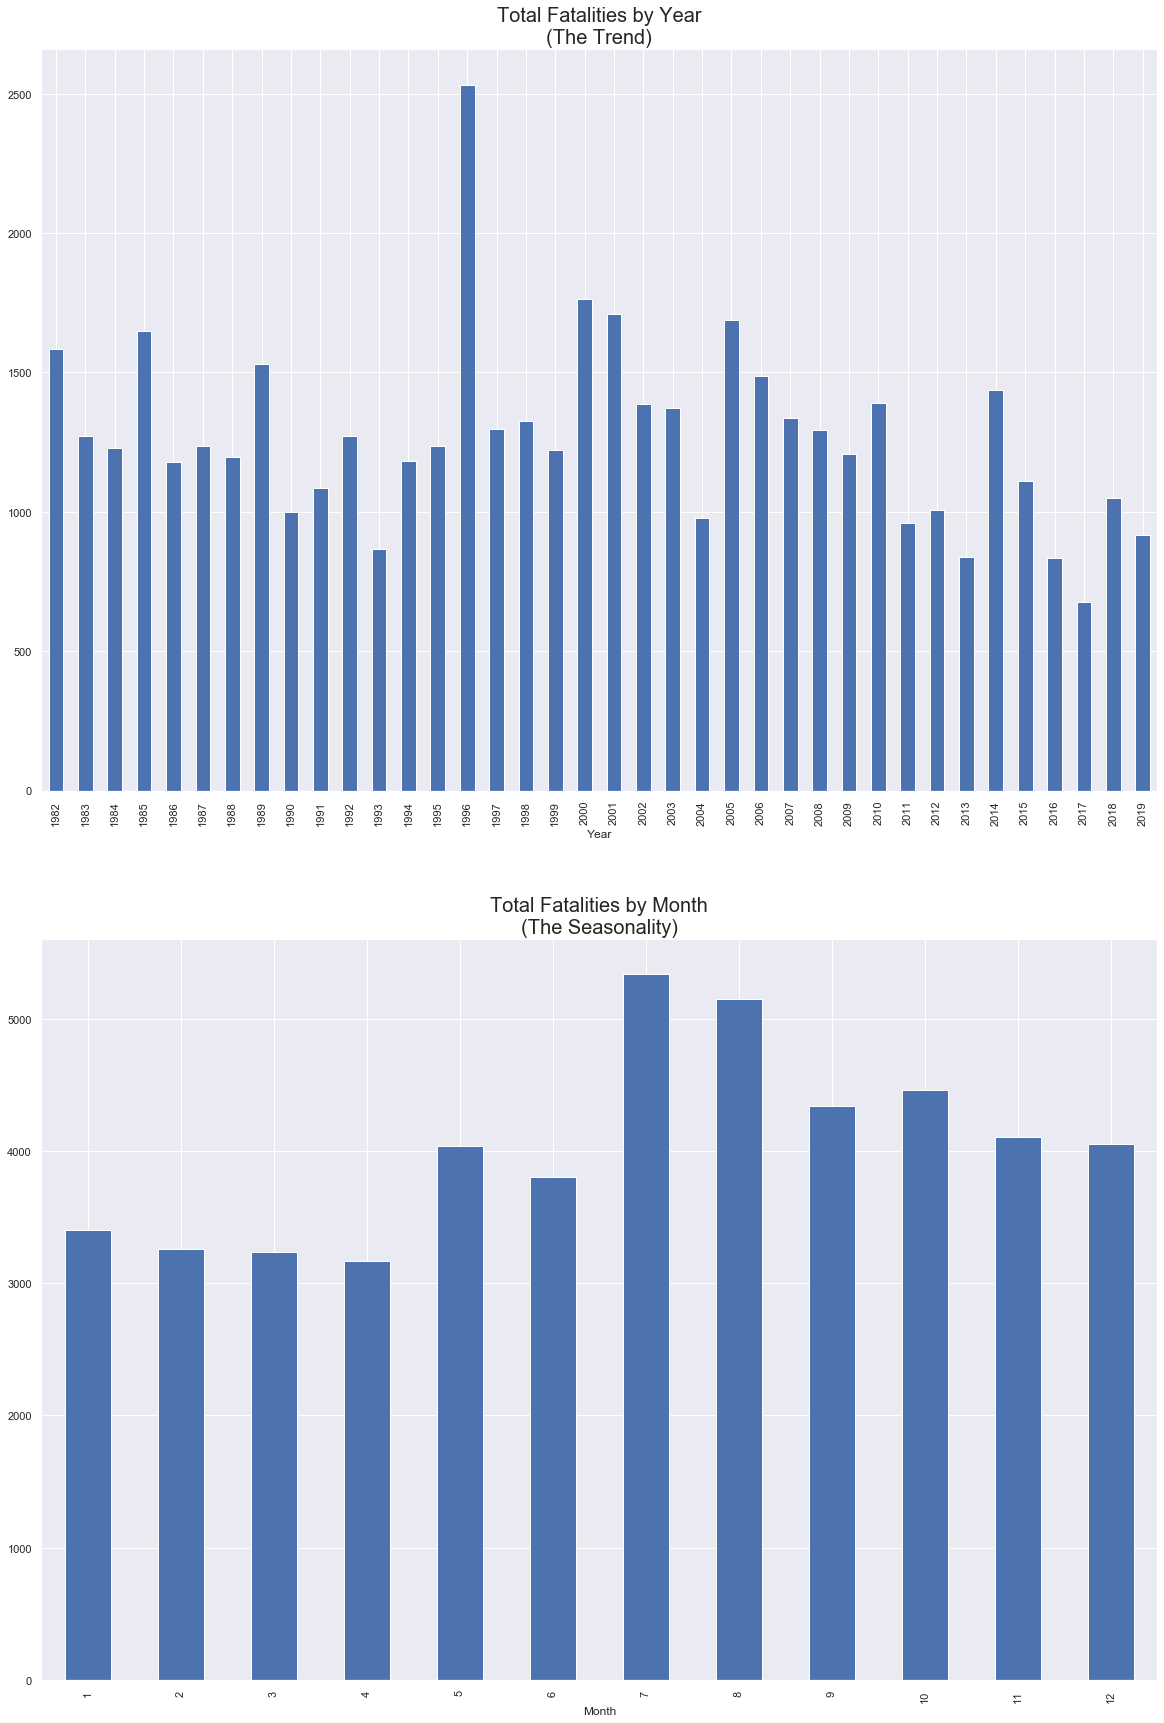

In [42]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 30))

aviationData_clean_1982.groupby(by = 'Year')['Total.Fatal.Injuries'].sum().plot(kind = 'bar', ax = axes[0])
aviationData_clean_1982.groupby(by = 'Month')['Total.Fatal.Injuries'].sum().plot(kind = 'bar', ax = axes[1])
axes[0].set_title(label = 'Total Fatalities by Year\n(The Trend)', fontsize = 20); 
axes[1].set_title(label = 'Total Fatalities by Month\n(The Seasonality)', fontsize = 20)
plt.show()

1996 was an outlier. A simple google search online revealed that 1996 was the bloodiest year in aviation for that time period. There were mysterious aviation disasters in that year that caused it. More info could be found here: https://www.washingtonpost.com/archive/politics/1996/12/31/mysterious-aviation-disasters-help-set-a-deadly-record-in-1996/f1a9d8fe-bf61-438d-949d-822aca893de7/

Also, we can see that July has the most fatalities, and as discussed above, it is due to it being the busiest month for aviation.

Now we plot the ratio of fatalities against accidents.

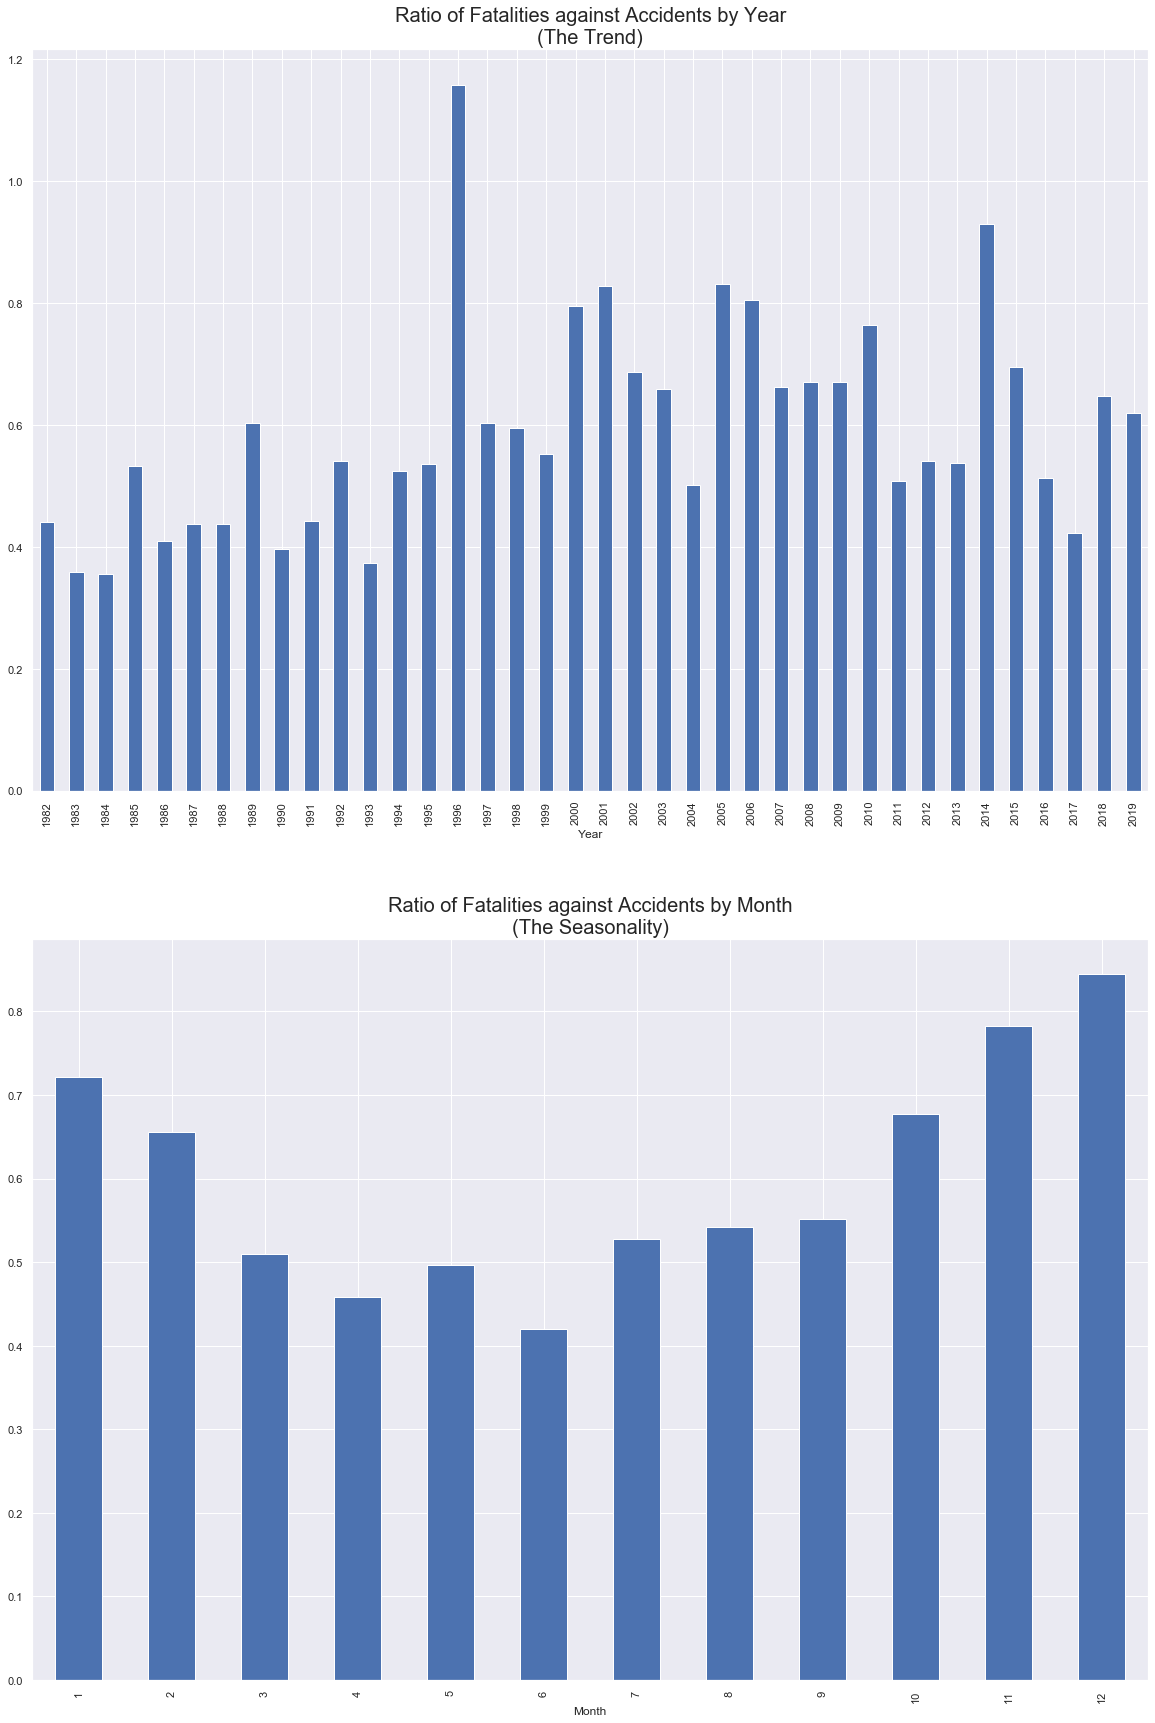

In [43]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 30))

year_ratio = aviationData_clean_1982.groupby(by = 'Year')['Total.Fatal.Injuries'].sum()/aviationData_clean_1982.groupby(by = 'Year').size()
month_ratio = aviationData_clean_1982.groupby(by = 'Month')['Total.Fatal.Injuries'].sum()/aviationData_clean_1982.groupby(by = 'Month').size()

year_ratio.plot(kind = 'bar', ax = axes[0])
month_ratio.plot(kind = 'bar', ax = axes[1])
axes[0].set_title(label = 'Ratio of Fatalities against Accidents by Year\n(The Trend)', fontsize = 20); 
axes[1].set_title(label = 'Ratio of Fatalities against Accidents by Month\n(The Seasonality)', fontsize = 20)
plt.show()

From the above, the year ratio 'trend' is about the same as the trend for fatalities, or even so slightly higher. It means that the fatalities per accident did not change much, and the increase is not significant. For month however, although July has the most number of aviation accidents, it turns out that it has the lowest fatalities against accidents ratio, meaning that even though there were more accidents, people are more likely to survive them as compared to the other months.

Another reason why December has the highest fatalities ratio is probably because it is winter period for most European countries, which means that there may be more fatalities due to extreme weather conditions, sometimes resulting in poor visibility for the pilots.

Let's plot the injuries bar graph.

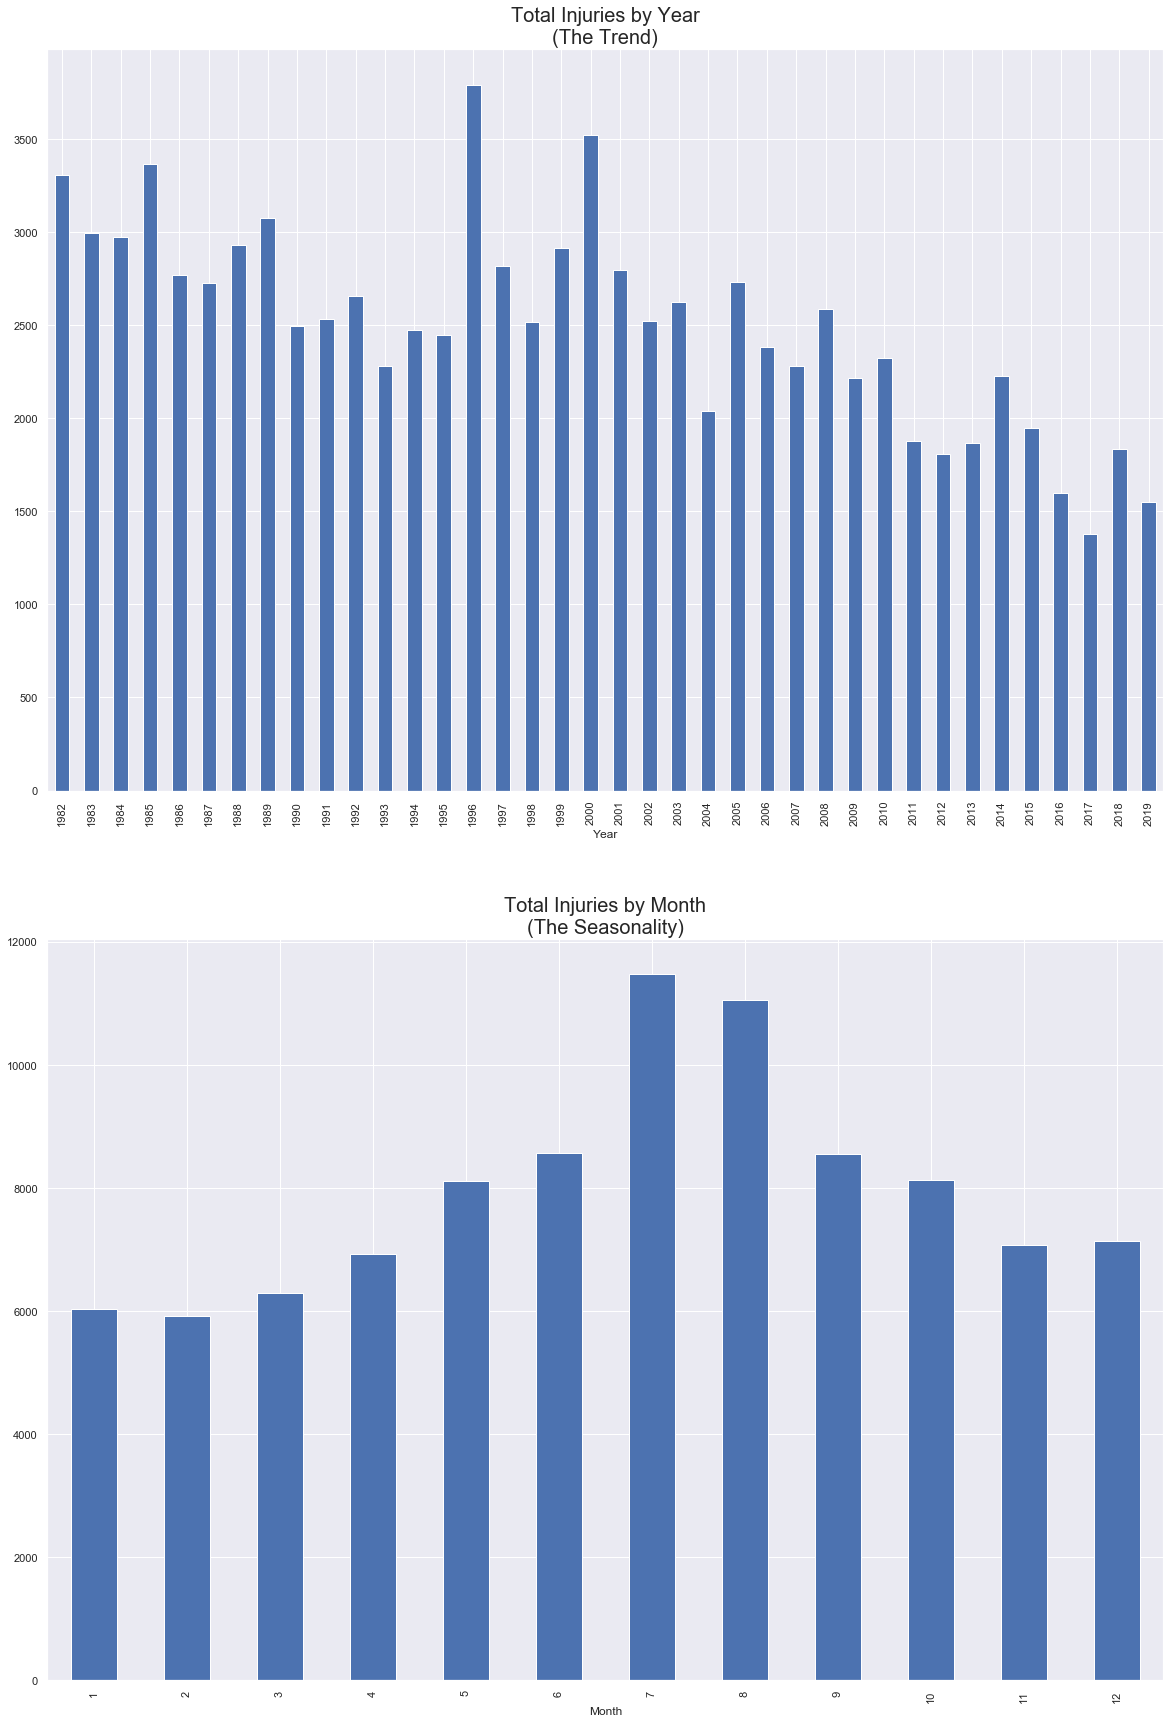

In [44]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 30))

aviationData_clean_1982.groupby(by = 'Year')['Injuries'].sum().plot(kind = 'bar', ax = axes[0])
aviationData_clean_1982.groupby(by = 'Month')['Injuries'].sum().plot(kind = 'bar', ax = axes[1])
axes[0].set_title(label = 'Total Injuries by Year\n(The Trend)', fontsize = 20); 
axes[1].set_title(label = 'Total Injuries by Month\n(The Seasonality)', fontsize = 20)
plt.show()

The injuries per month corresponds is as expected, where July has the most injuries as there are more flights. For years, it is very clear that the number of injuries decreased.

Let's plot the ratio.

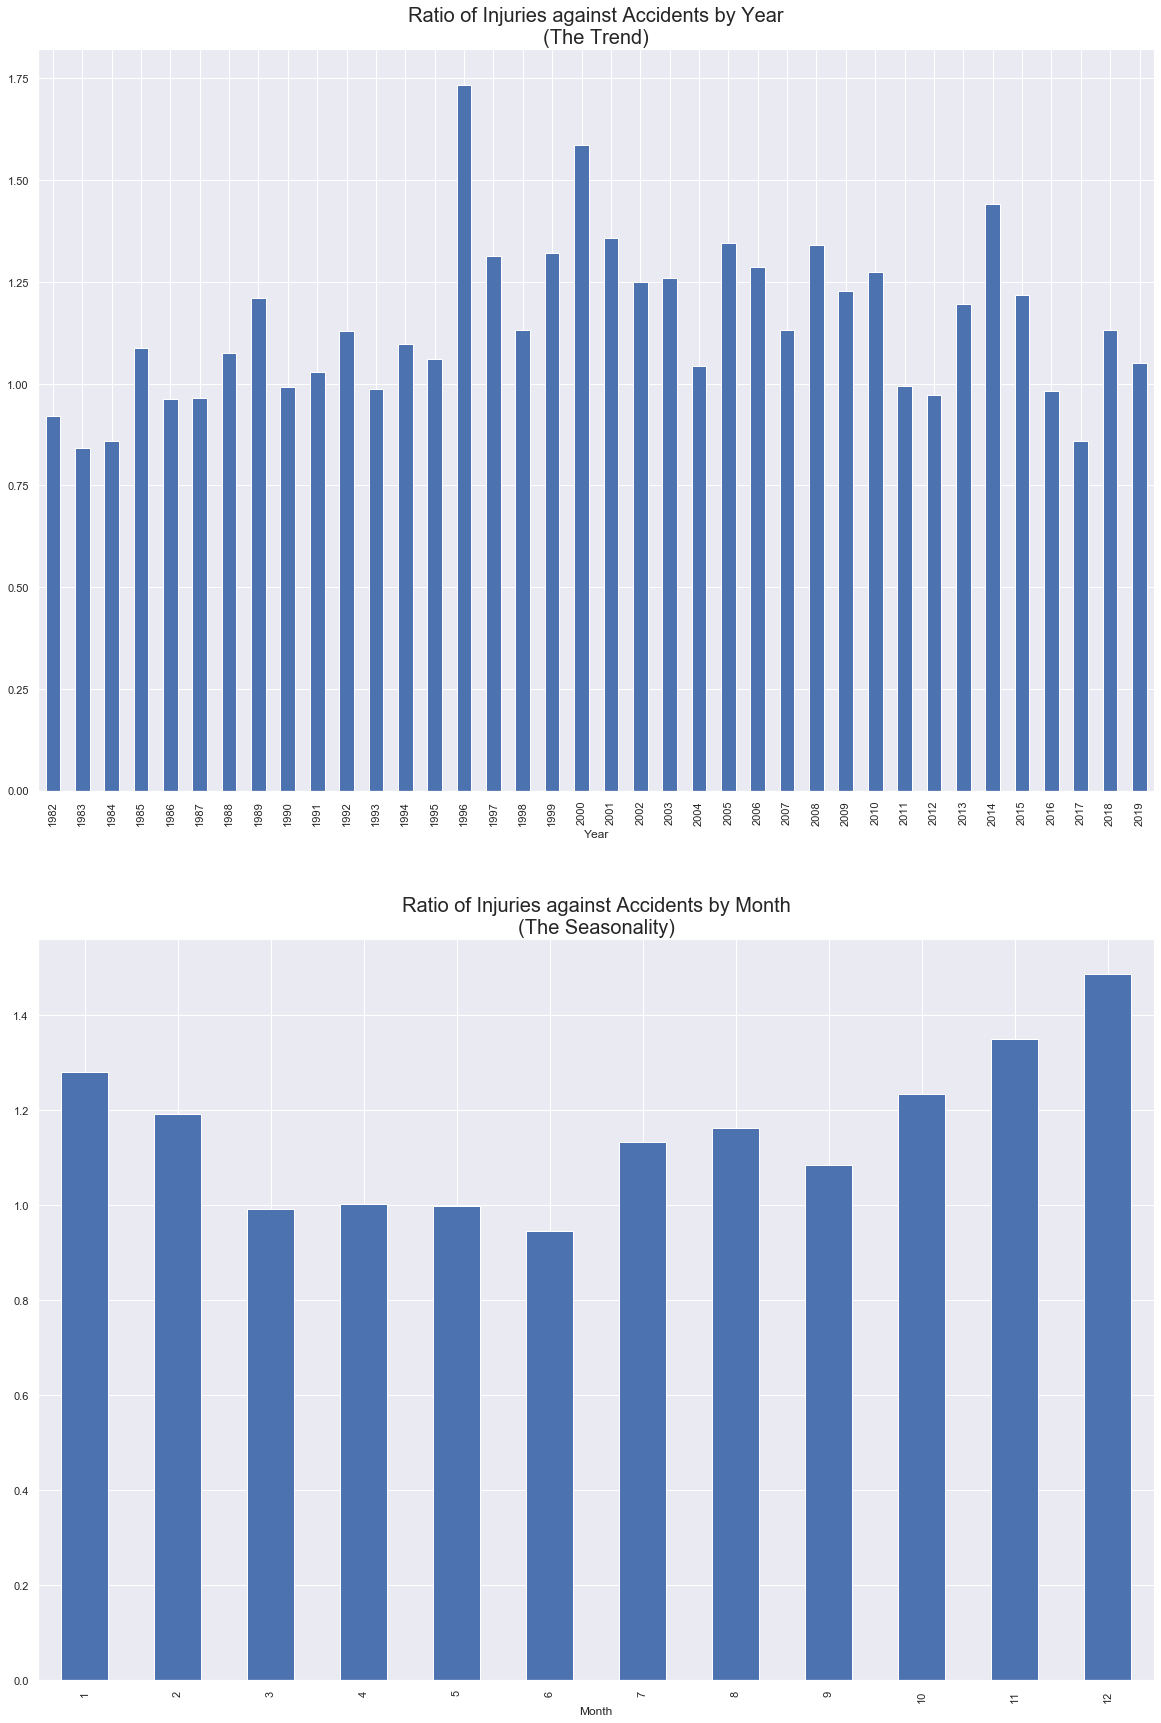

In [45]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 30))

year_ratio = aviationData_clean_1982.groupby(by = 'Year')['Injuries'].sum()/aviationData_clean_1982.groupby(by = 'Year').size()
month_ratio = aviationData_clean_1982.groupby(by = 'Month')['Injuries'].sum()/aviationData_clean_1982.groupby(by = 'Month').size()

year_ratio.plot(kind = 'bar', ax = axes[0])
month_ratio.plot(kind = 'bar', ax = axes[1])
axes[0].set_title(label = 'Ratio of Injuries against Accidents by Year\n(The Trend)', fontsize = 20); 
axes[1].set_title(label = 'Ratio of Injuries against Accidents by Month\n(The Seasonality)', fontsize = 20)
plt.show()

As for yearly ratio, the injuries against accident is more or less the same throughout, which make sense. The number of accidents decrease, as well as the total injuries. So the ratio should be almost stagnant. For monthly ratio, it seems to be similar to the fatalities, where the middle of the year has less injuries per accident compared to the rest.

---
# How much? How many?

We will be predicting the number of accidents per year. The year will be our predictor, while the number of accidents will be our response variable.

### Linear Regression using Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the following:
> `LinearRegression` model from `sklearn.linear_model`  
> `train_test_split` from `sklearn.model_selection`  
> `mean_squared_error` from `sklearn.metrics.`  

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Set up the regression problem with Train and Test datasets.   
Randomly split the Train Set and Test Set, with 25% of the data in the Test Set.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(data = accidents_per_year.index), accidents_per_year, test_size = 0.25)

Create the linear regression object and fit the regression model.

In [48]:
linreg = LinearRegression()
linreg.fit(X = X_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We have *trained* the model to fit the following formula.

>  Regression Problem : Total = $a$ $\times$ HP + $b$

Check Intercept ($a$) and Coefficient ($b$) of the regression line.

In [49]:
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  86028.73778820298
Coefficients of Regression 	: a =  [-41.90244293]


Plot the regression line based on the coefficients-intercept form and as well as prediction using the model.

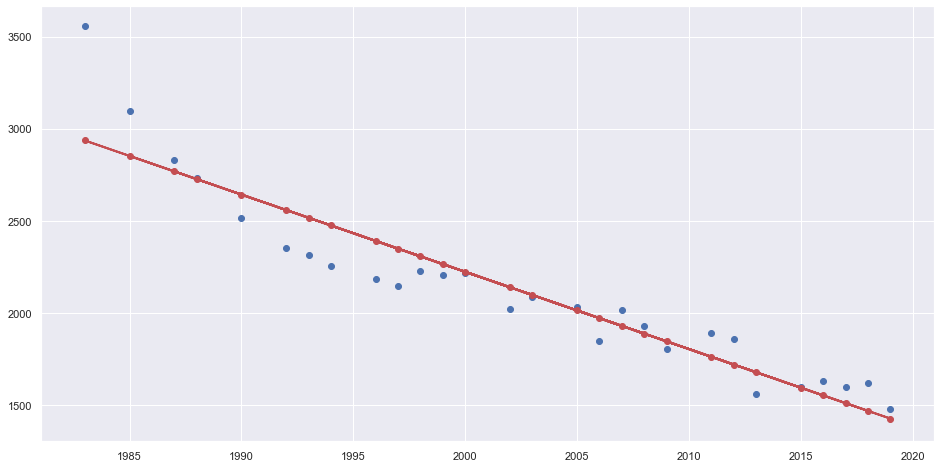

In [50]:
regline_y_train = linreg.intercept_ + linreg.coef_ * X_train
y_train_pred = linreg.predict(X = X_train)

f, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))

plt.scatter(x = X_train, y = y_train)
plt.scatter(x = X_train, y = y_train_pred, color = 'r')
plt.plot(X_train, regline_y_train, 'r-', linewidth = 2)
plt.show()

### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Explained Variance and Mean Squared Error.

In [51]:
print('Explained Variance (R^2) \t:', linreg.score(X = X_train, y = y_train))
print('Mean Squared Error (MSE) \t:', mean_squared_error(y_true = y_train, y_pred = y_train_pred))
print('Root Mean Squared Error (RMSE) \t:', mean_squared_error(y_true = y_train, y_pred = y_train_pred, squared = False))

Explained Variance (R^2) 	: 0.870366252457941
Mean Squared Error (MSE) 	: 29151.791107696587
Root Mean Squared Error (RMSE) 	: 170.73895603434087


Test the Linear Regression model `linreg` using the Test Set. 

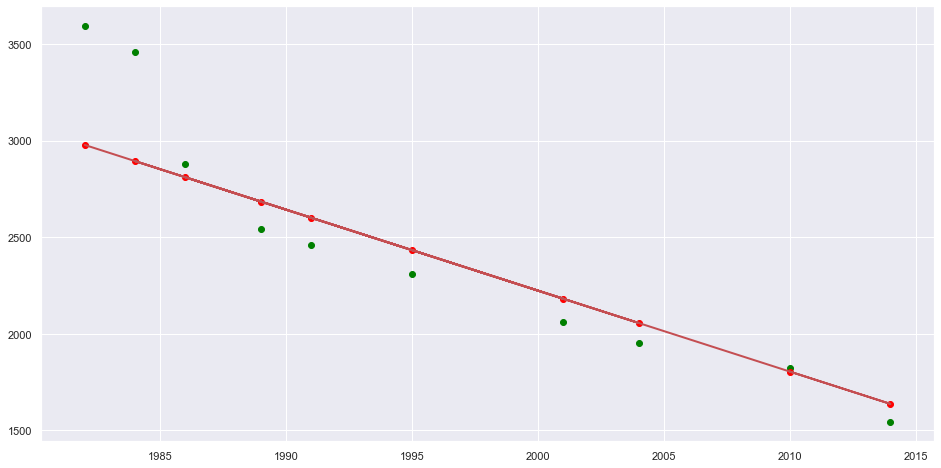

In [52]:
regline_y_test = linreg.intercept_ + linreg.coef_ * X_test
y_test_pred = linreg.predict(X = X_test)

f, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))

plt.scatter(x = X_test, y = y_test, color = 'green')
plt.scatter(x = X_test, y = y_test_pred, color = 'red')
plt.plot(X_test, regline_y_test, 'r-', linewidth = 2)
plt.show()

Check how good the predictions are on the Test Set.    
Metrics : Explained Variance and Mean Squared Error.

In [53]:
print('Explained Variance (R^2) \t:', linreg.score(X = X_test, y = y_test))
print('Mean Squared Error (MSE) \t:', mean_squared_error(y_true = y_test, y_pred = y_test_pred))
print('Root Mean Squared Error (RMSE) \t:', mean_squared_error(y_true = y_test, y_pred = y_test_pred, squared = False))

Explained Variance (R^2) 	: 0.8098661287350446
Mean Squared Error (MSE) 	: 78777.71246125668
Root Mean Squared Error (RMSE) 	: 280.67367611027703


We ran the model and predictions only one time above, which might not be reliable. We will split the data randomly 100 times and get the mean intercept and coefficents.

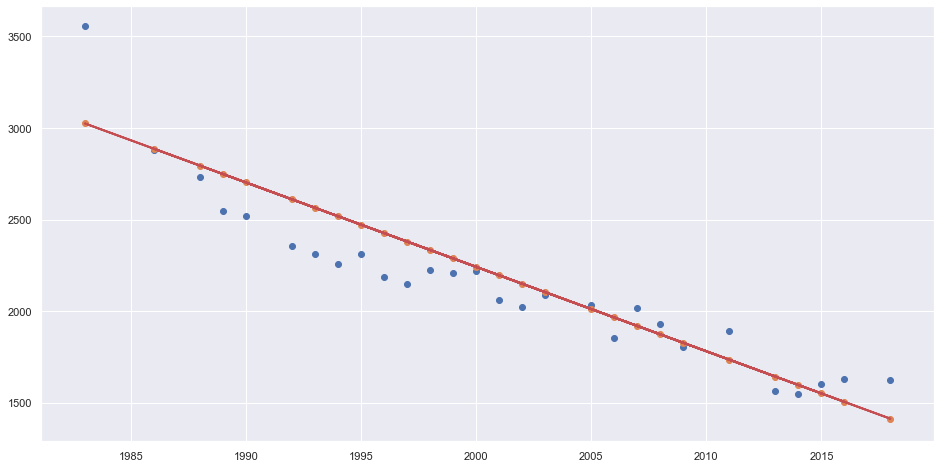

In [54]:
intercepts = []
coefs = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(data = accidents_per_year.index), accidents_per_year, test_size = 0.25)
    linreg.fit(X = X_train, y = y_train)
    intercepts.append(linreg.intercept_)
    coefs.extend(linreg.coef_)
    
regline_y_train = np.mean(a = intercepts) + np.mean(a = coefs) * X_train

f, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))

plt.scatter(x = X_train, y = y_train)
plt.scatter(x = X_train, y = regline_y_train)
plt.plot(X_train, regline_y_train, 'r-', linewidth = 2)
plt.show()

Check out the regression line using the Test Set.

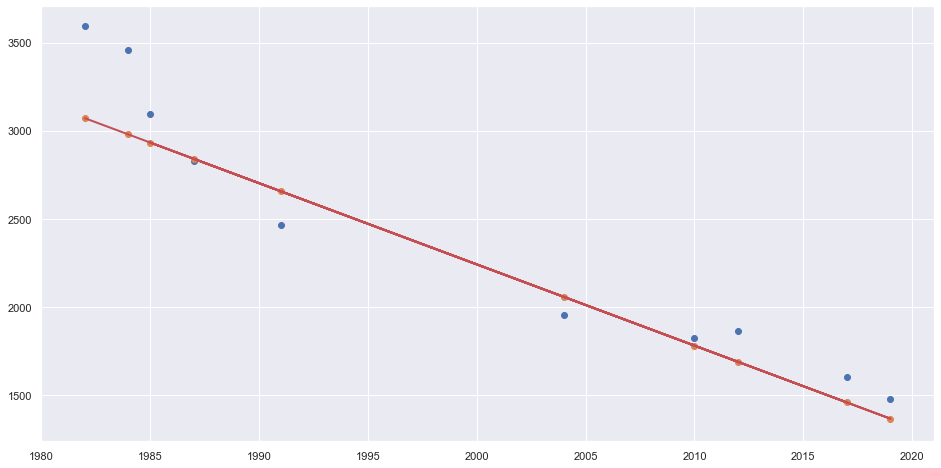

In [55]:
regline_y_test = np.mean(a = intercepts) + np.mean(a = coefs) * X_test

f, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))

plt.scatter(x = X_test, y = y_test)
plt.scatter(x = X_test, y = regline_y_test)
plt.plot(X_test, regline_y_test, 'r-', linewidth = 2)
plt.show()

Let's check this line against the whole data.

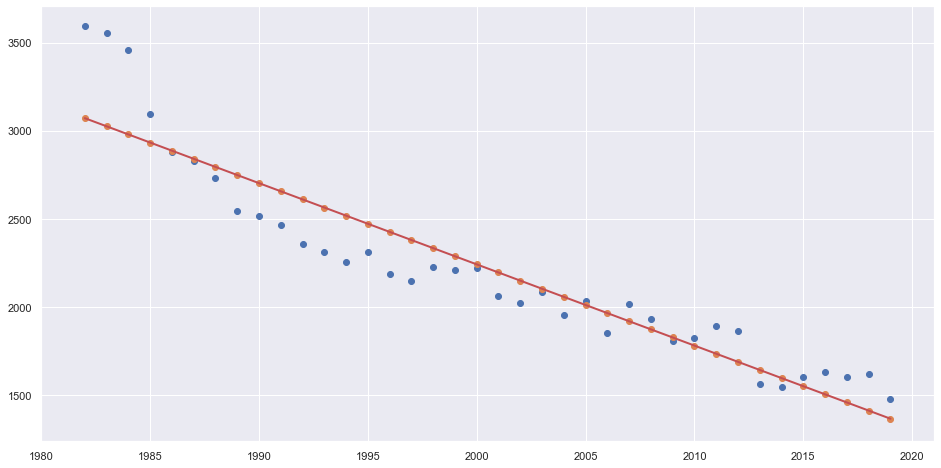

In [56]:
regline_y = np.mean(a = intercepts) + np.mean(a = coefs) * pd.DataFrame(data = accidents_per_year.index)

f, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))

plt.scatter(x = pd.DataFrame(data = accidents_per_year.index), y = accidents_per_year)
plt.scatter(x = pd.DataFrame(data = accidents_per_year.index), y = regline_y)
plt.plot(pd.DataFrame(data = accidents_per_year.index), regline_y, 'r-', linewidth = 2)
plt.show()

Here is the exciting part. Let us extrapolate the data!

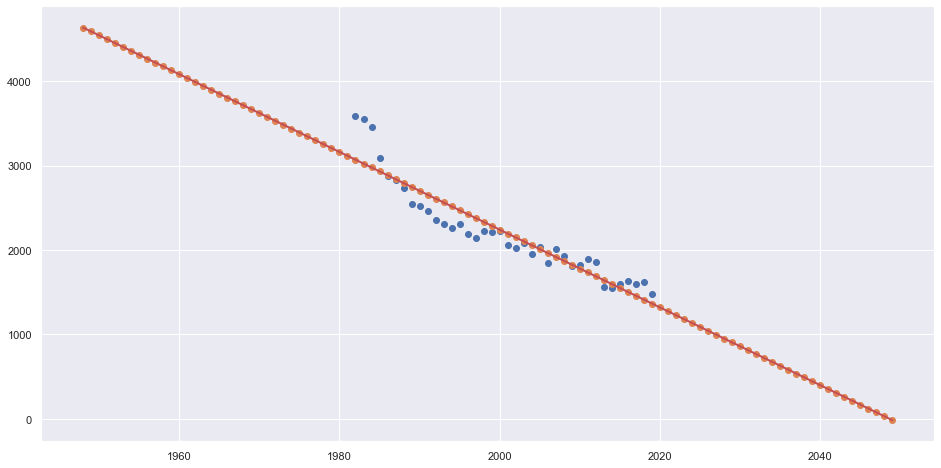

In [57]:
year_range = pd.DataFrame(data = [i for i in range(1948, 2050)])

regline_y = np.mean(a = intercepts) + np.mean(a = coefs) * year_range

f, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))

plt.scatter(x = pd.DataFrame(data = accidents_per_year.index), y = accidents_per_year)
plt.scatter(x = year_range, y = regline_y)
plt.plot(year_range, regline_y, 'r-', linewidth = 2)
plt.show()

As we can see from the plot above, in 2049, the number of fatalities is predicted to be 12 and the following year to be negative. With this prediction, since fatalities cannot be less than 0, the number of fatalities in 2050 would be virtually 0. This model is pretty reliable since it fits both the train and test model well, and we ran it 100 times. We could improve this model if we had more data of the earlier years.

---
# How much? How many?

We will be predicting the number of injuries for each accident that have injuries.

### Linear Regression using Keras

Import the following:
> `Sequential` model from `keras.models`  
> `Dense` from `keras.layers`  
> `KerasRegressor` from `keras.wrappers.scikit_learn`  
> `cross_val_score` from `sklearn.model_selection`  
> `KFold` from `sklearn.model_selection`  
> `StandardScaler` from `sklearn.preprocessing`  
> `Pipeline` from `sklearn.pipeline`   
> `train_test_split` from `sklearn.model_selection`  
> `explained_variance_score` from `sklearn.metrics`  

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

Using TensorFlow backend.


These will be the variables we will be using to predict.

| Variables             | Observation      |    
| :-------------------: | :--------------: |    
| Investigation.Type    | Categorical      |   
| Aircraft.Damage       | Categorial       |
| Aircraft.Category     | Categorial       |   
| Amateur.Built         | Boolean          |   
| Number.of.Engines     | Numeric Variable |   
| Engine.Type           | Categorial       |   
| FAR.Description       | Categorial       |   
| Schedule              | Categorial       |    
| Purpose.of.Flight     | Categorial       |    
| Weather.Condition     | Categorial       |    
| Broad.Phase.of.Flight | Categorial       |    
| Report.Status         | Categorial       |     
| Year                  | Numeric Variable |    
| Month                 | Numeric Variable |    
| Date                  | Numeric Variable |

Do one-hot encoding, and remove rows with 0 injuries. We also remove Longitude, Latitude and the injuries columns (except Injuries itself).

In [59]:
aviationData_onehot = pd.get_dummies(data = aviationData_clean_1982, columns = [i for i in aviationData_clean_1982 if hasattr(aviationData_clean_1982[i], 'cat')])._get_numeric_data()

aviationData_onehot = aviationData_onehot[aviationData_onehot['Injuries'] > 0]
aviationData_onehot.reset_index(drop = True, inplace = True)

aviationData_onehot.drop(columns = injuries_columns, inplace = True)
aviationData_onehot.drop(columns = ['Latitude', 'Longitude'], inplace = True)

We look at the distribution using a boxplot.

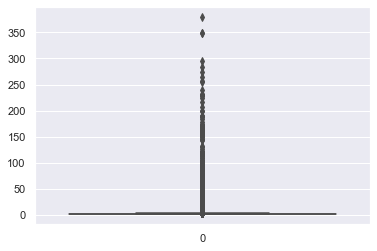

In [60]:
sb.boxplot(data = aviationData_onehot['Injuries'])

There are way too many outliers! Perhaps we should try to look at injuries above 20.

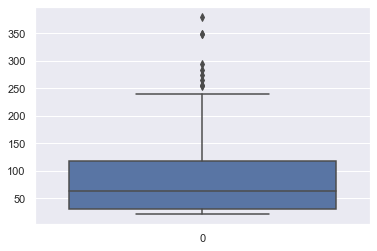

In [61]:
aviationData_onehot = aviationData_onehot[aviationData_onehot['Injuries'] > 20]
aviationData_onehot.reset_index(drop = True, inplace = True)

sb.boxplot(data = aviationData_onehot['Injuries'])

Much better! There are way less outlier and data is more evenly spread out.

We split into X and y.

In [62]:
X = aviationData_onehot.drop(columns = 'Injuries')
y = aviationData_onehot['Injuries']

Randomly split the Train Set and Test Set, with 25% of the data in the Test Set.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

We create a function with a model. We add layers and compile the model.

In [64]:
def model():
    model = Sequential()
    model.add(layer = Dense(units = 100, input_dim = 100, kernel_initializer = 'normal', activation = 'relu'))
    model.add(layer = Dense(units = 1, kernel_initializer = 'normal'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

We train the model!

In [65]:
estimators = []

estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = model, epochs = 200, batch_size = 1, verbose = 1)))

pipeline = Pipeline(steps = estimators)
kfold = KFold(n_splits = 10)
results = cross_val_score(estimator = pipeline, X = X_train, y = y_train, cv = kfold)

Epoch 1/200
166/166 [==============================] - 0s 921us/step - loss: 11821.2188
Epoch 2/200
166/166 [==============================] - 0s 541us/step - loss: 9966.5772
Epoch 3/200
166/166 [==============================] - 0s 530us/step - loss: 7068.6173
Epoch 4/200
166/166 [==============================] - 0s 536us/step - loss: 5230.9278
Epoch 5/200
166/166 [==============================] - 0s 669us/step - loss: 4432.3648
Epoch 6/200
166/166 [==============================] - 0s 703us/step - loss: 4045.9999
Epoch 7/200
166/166 [==============================] - 0s 613us/step - loss: 3821.7981
Epoch 8/200
166/166 [==============================] - 0s 599us/step - loss: 3694.6381
Epoch 9/200
166/166 [==============================] - 0s 536us/step - loss: 3606.1311
Epoch 10/200
166/166 [==============================] - 0s 553us/step - loss: 3538.4318
Epoch 11/200
166/166 [==============================] - 0s 543us/step - loss: 3466.1566
Epoch 12/200
166/166 [==================

166/166 [==============================] - 0s 703us/step - loss: 2118.0741
Epoch 95/200
166/166 [==============================] - 0s 588us/step - loss: 2118.0270
Epoch 96/200
166/166 [==============================] - 0s 552us/step - loss: 2106.9090
Epoch 97/200
166/166 [==============================] - 0s 564us/step - loss: 2111.2192
Epoch 98/200
166/166 [==============================] - 0s 550us/step - loss: 2094.6727
Epoch 99/200
166/166 [==============================] - 0s 558us/step - loss: 2067.7830
Epoch 100/200
166/166 [==============================] - 0s 570us/step - loss: 2066.9370
Epoch 101/200
166/166 [==============================] - 0s 564us/step - loss: 2066.3252
Epoch 102/200
166/166 [==============================] - 0s 535us/step - loss: 2050.8643
Epoch 103/200
166/166 [==============================] - 0s 508us/step - loss: 2041.2708
Epoch 104/200
166/166 [==============================] - 0s 505us/step - loss: 2054.5977
Epoch 105/200
166/166 [=================

166/166 [==============================] - 0s 527us/step - loss: 1695.8338
Epoch 78/200
166/166 [==============================] - 0s 554us/step - loss: 1696.5762
Epoch 79/200
166/166 [==============================] - 0s 516us/step - loss: 1683.5714
Epoch 80/200
166/166 [==============================] - 0s 511us/step - loss: 1673.7458
Epoch 81/200
166/166 [==============================] - 0s 503us/step - loss: 1671.7541
Epoch 82/200
166/166 [==============================] - 0s 505us/step - loss: 1654.9994
Epoch 83/200
166/166 [==============================] - 0s 511us/step - loss: 1652.2180
Epoch 84/200
166/166 [==============================] - 0s 508us/step - loss: 1650.7760
Epoch 85/200
166/166 [==============================] - 0s 527us/step - loss: 1644.6137
Epoch 86/200
166/166 [==============================] - 0s 545us/step - loss: 1627.9140
Epoch 87/200
166/166 [==============================] - 0s 500us/step - loss: 1625.5278
Epoch 88/200
166/166 [=======================

166/166 [==============================] - 0s 559us/step - loss: 2407.8621
Epoch 62/200
166/166 [==============================] - 0s 556us/step - loss: 2405.0431
Epoch 63/200
166/166 [==============================] - 0s 544us/step - loss: 2398.8379
Epoch 64/200
166/166 [==============================] - 0s 505us/step - loss: 2377.8457
Epoch 65/200
166/166 [==============================] - 0s 560us/step - loss: 2380.9781
Epoch 66/200
166/166 [==============================] - 0s 634us/step - loss: 2371.8697
Epoch 67/200
166/166 [==============================] - 0s 570us/step - loss: 2356.9722
Epoch 68/200
166/166 [==============================] - 0s 556us/step - loss: 2343.0433
Epoch 69/200
166/166 [==============================] - 0s 599us/step - loss: 2333.5803
Epoch 70/200
166/166 [==============================] - 0s 550us/step - loss: 2333.1277
Epoch 71/200
166/166 [==============================] - 0s 541us/step - loss: 2309.6770
Epoch 72/200
166/166 [=======================

166/166 [==============================] - 0s 514us/step - loss: 2499.4518
Epoch 46/200
166/166 [==============================] - 0s 511us/step - loss: 2490.2242
Epoch 47/200
166/166 [==============================] - 0s 511us/step - loss: 2474.2862
Epoch 48/200
166/166 [==============================] - 0s 531us/step - loss: 2448.2867
Epoch 49/200
166/166 [==============================] - 0s 522us/step - loss: 2436.0697
Epoch 50/200
166/166 [==============================] - 0s 543us/step - loss: 2419.7918
Epoch 51/200
166/166 [==============================] - 0s 527us/step - loss: 2404.2180
Epoch 52/200
166/166 [==============================] - 0s 522us/step - loss: 2399.5160
Epoch 53/200
166/166 [==============================] - 0s 544us/step - loss: 2394.0204
Epoch 54/200
166/166 [==============================] - 0s 547us/step - loss: 2371.5670
Epoch 55/200
166/166 [==============================] - 0s 519us/step - loss: 2357.5781
Epoch 56/200
166/166 [=======================

Epoch 29/200
166/166 [==============================] - 0s 520us/step - loss: 2887.8950
Epoch 30/200
166/166 [==============================] - 0s 512us/step - loss: 2867.1588
Epoch 31/200
166/166 [==============================] - 0s 517us/step - loss: 2837.8953
Epoch 32/200
166/166 [==============================] - 0s 547us/step - loss: 2838.1657
Epoch 33/200
166/166 [==============================] - 0s 563us/step - loss: 2798.5078
Epoch 34/200
166/166 [==============================] - 0s 552us/step - loss: 2788.8086
Epoch 35/200
166/166 [==============================] - 0s 516us/step - loss: 2763.5955
Epoch 36/200
166/166 [==============================] - 0s 507us/step - loss: 2733.4460
Epoch 37/200
166/166 [==============================] - 0s 499us/step - loss: 2725.5906
Epoch 38/200
166/166 [==============================] - 0s 493us/step - loss: 2714.4328
Epoch 39/200
166/166 [==============================] - 0s 505us/step - loss: 2692.0413
Epoch 40/200
166/166 [==========

167/167 [==============================] - 0s 565us/step - loss: 3099.0746
Epoch 13/200
167/167 [==============================] - 0s 578us/step - loss: 3050.3863
Epoch 14/200
167/167 [==============================] - 0s 576us/step - loss: 3011.2747
Epoch 15/200
167/167 [==============================] - 0s 575us/step - loss: 2981.5338
Epoch 16/200
167/167 [==============================] - 0s 557us/step - loss: 2934.4577
Epoch 17/200
167/167 [==============================] - 0s 554us/step - loss: 2903.5595
Epoch 18/200
167/167 [==============================] - 0s 576us/step - loss: 2879.0426
Epoch 19/200
167/167 [==============================] - 0s 568us/step - loss: 2854.0064
Epoch 20/200
167/167 [==============================] - 0s 563us/step - loss: 2848.8472
Epoch 21/200
167/167 [==============================] - 0s 566us/step - loss: 2817.7930
Epoch 22/200
167/167 [==============================] - 0s 551us/step - loss: 2807.3011
Epoch 23/200
167/167 [=======================

167/167 [==============================] - 0s 572us/step - loss: 1373.9992
Epoch 197/200
167/167 [==============================] - 0s 563us/step - loss: 1387.8287
Epoch 198/200
167/167 [==============================] - 0s 566us/step - loss: 1381.0487
Epoch 199/200
167/167 [==============================] - 0s 570us/step - loss: 1380.4178
Epoch 200/200
18/18 [==============================] - 0s 700us/step
Epoch 1/200
167/167 [==============================] - 0s 838us/step - loss: 12267.7712
Epoch 2/200
167/167 [==============================] - 0s 526us/step - loss: 10263.8372
Epoch 3/200
167/167 [==============================] - 0s 523us/step - loss: 7334.6771
Epoch 4/200
167/167 [==============================] - 0s 507us/step - loss: 5417.8705
Epoch 5/200
167/167 [==============================] - 0s 506us/step - loss: 4594.2480
Epoch 6/200
167/167 [==============================] - 0s 501us/step - loss: 4265.1408
Epoch 7/200
167/167 [==============================] - 0s 490us/s

167/167 [==============================] - 0s 526us/step - loss: 1267.7158
Epoch 181/200
167/167 [==============================] - 0s 514us/step - loss: 1256.2042
Epoch 182/200
167/167 [==============================] - 0s 505us/step - loss: 1257.0084
Epoch 183/200
167/167 [==============================] - 0s 506us/step - loss: 1245.7206
Epoch 184/200
167/167 [==============================] - 0s 506us/step - loss: 1249.6772
Epoch 185/200
167/167 [==============================] - 0s 498us/step - loss: 1232.3184
Epoch 186/200
167/167 [==============================] - 0s 514us/step - loss: 1225.3010
Epoch 187/200
167/167 [==============================] - 0s 510us/step - loss: 1227.2912
Epoch 188/200
167/167 [==============================] - 0s 514us/step - loss: 1228.6542
Epoch 189/200
167/167 [==============================] - 0s 522us/step - loss: 1218.6746
Epoch 190/200
167/167 [==============================] - 0s 531us/step - loss: 1214.1258
Epoch 191/200
167/167 [============

167/167 [==============================] - 0s 525us/step - loss: 1727.6654
Epoch 165/200
167/167 [==============================] - 0s 517us/step - loss: 1710.4889
Epoch 166/200
167/167 [==============================] - 0s 508us/step - loss: 1687.0478
Epoch 167/200
167/167 [==============================] - 0s 548us/step - loss: 1688.5126
Epoch 168/200
167/167 [==============================] - 0s 507us/step - loss: 1677.5033
Epoch 169/200
167/167 [==============================] - 0s 507us/step - loss: 1677.8823
Epoch 170/200
167/167 [==============================] - 0s 514us/step - loss: 1673.6280
Epoch 171/200
167/167 [==============================] - 0s 528us/step - loss: 1671.8166
Epoch 172/200
167/167 [==============================] - 0s 509us/step - loss: 1663.5496
Epoch 173/200
167/167 [==============================] - 0s 513us/step - loss: 1656.8094
Epoch 174/200
167/167 [==============================] - 0s 514us/step - loss: 1645.6391
Epoch 175/200
167/167 [============

167/167 [==============================] - 0s 508us/step - loss: 1792.1229
Epoch 148/200
167/167 [==============================] - 0s 496us/step - loss: 1805.2128
Epoch 149/200
167/167 [==============================] - 0s 514us/step - loss: 1775.4150
Epoch 150/200
167/167 [==============================] - 0s 504us/step - loss: 1779.3690
Epoch 151/200
167/167 [==============================] - 0s 496us/step - loss: 1779.8148
Epoch 152/200
167/167 [==============================] - 0s 508us/step - loss: 1757.9290
Epoch 153/200
167/167 [==============================] - 0s 502us/step - loss: 1781.5643
Epoch 154/200
167/167 [==============================] - 0s 500us/step - loss: 1761.9891
Epoch 155/200
167/167 [==============================] - 0s 508us/step - loss: 1754.8303
Epoch 156/200
167/167 [==============================] - 0s 514us/step - loss: 1766.5271
Epoch 157/200
167/167 [==============================] - 0s 507us/step - loss: 1747.7805
Epoch 158/200
167/167 [============

167/167 [==============================] - 0s 535us/step - loss: 1413.6010
Epoch 131/200
167/167 [==============================] - 0s 550us/step - loss: 1416.1188
Epoch 132/200
167/167 [==============================] - 0s 526us/step - loss: 1403.8314
Epoch 133/200
167/167 [==============================] - 0s 508us/step - loss: 1392.1416
Epoch 134/200
167/167 [==============================] - 0s 518us/step - loss: 1385.2335
Epoch 135/200
167/167 [==============================] - 0s 508us/step - loss: 1379.0549
Epoch 136/200
167/167 [==============================] - 0s 505us/step - loss: 1372.2236
Epoch 137/200
167/167 [==============================] - 0s 513us/step - loss: 1367.5490
Epoch 138/200
167/167 [==============================] - 0s 508us/step - loss: 1359.0982
Epoch 139/200
167/167 [==============================] - 0s 513us/step - loss: 1346.4164
Epoch 140/200
167/167 [==============================] - 0s 532us/step - loss: 1342.3792
Epoch 141/200
167/167 [============

After training the model, we fit it with both train and test data and predict!

In [66]:
pipeline.fit(X = X_train, y = y_train)
y_train_pred = pd.DataFrame(data = pipeline.predict(X = X_train))
pipeline.fit(X = X_test, y = y_test)
y_test_pred = pd.DataFrame(data = pipeline.predict(X = X_test))

Epoch 1/200
185/185 [==============================] - 0s 844us/step - loss: 11895.6305
Epoch 2/200
185/185 [==============================] - 0s 501us/step - loss: 9692.2391
Epoch 3/200
185/185 [==============================] - 0s 499us/step - loss: 6684.0438
Epoch 4/200
185/185 [==============================] - 0s 501us/step - loss: 4942.1017
Epoch 5/200
185/185 [==============================] - 0s 501us/step - loss: 4225.9096
Epoch 6/200
185/185 [==============================] - 0s 501us/step - loss: 3895.4234
Epoch 7/200
185/185 [==============================] - 0s 496us/step - loss: 3722.4783
Epoch 8/200
185/185 [==============================] - 0s 512us/step - loss: 3587.9052
Epoch 9/200
185/185 [==============================] - 0s 502us/step - loss: 3479.3271
Epoch 10/200
185/185 [==============================] - 0s 501us/step - loss: 3395.6759
Epoch 11/200
185/185 [==============================] - 0s 516us/step - loss: 3334.2136
Epoch 12/200
185/185 [==================

185/185 [==============================] - 0s 511us/step - loss: 1546.3685
Epoch 185/200
185/185 [==============================] - 0s 532us/step - loss: 1530.4714
Epoch 186/200
185/185 [==============================] - 0s 530us/step - loss: 1531.7801
Epoch 187/200
185/185 [==============================] - 0s 560us/step - loss: 1525.0942
Epoch 188/200
185/185 [==============================] - 0s 524us/step - loss: 1530.8638
Epoch 189/200
185/185 [==============================] - 0s 515us/step - loss: 1521.4972
Epoch 190/200
185/185 [==============================] - 0s 520us/step - loss: 1512.8995
Epoch 191/200
185/185 [==============================] - 0s 508us/step - loss: 1526.1610
Epoch 192/200
185/185 [==============================] - 0s 502us/step - loss: 1512.6084
Epoch 193/200
185/185 [==============================] - 0s 501us/step - loss: 1507.0286
Epoch 194/200
185/185 [==============================] - 0s 535us/step - loss: 1501.2922
Epoch 195/200
185/185 [============

62/62 [==============================] - 0s 513us/step - loss: 141.2380
Epoch 174/200
62/62 [==============================] - 0s 530us/step - loss: 142.0501
Epoch 175/200
62/62 [==============================] - 0s 514us/step - loss: 142.6626
Epoch 176/200
62/62 [==============================] - 0s 515us/step - loss: 137.2697
Epoch 177/200
62/62 [==============================] - 0s 518us/step - loss: 133.4539
Epoch 178/200
62/62 [==============================] - 0s 527us/step - loss: 132.8879
Epoch 179/200
62/62 [==============================] - 0s 529us/step - loss: 131.0226
Epoch 180/200
62/62 [==============================] - 0s 521us/step - loss: 126.9861
Epoch 181/200
62/62 [==============================] - 0s 535us/step - loss: 128.3661
Epoch 182/200
62/62 [==============================] - 0s 527us/step - loss: 134.1043
Epoch 183/200
62/62 [==============================] - 0s 521us/step - loss: 126.4367
Epoch 184/200
62/62 [==============================] - 0s 526us/step

Check how good the predictions are on the Train and Test Set.    
Metrics : Explained Variance and Mean Squared Error.

In [67]:
print('Train')
print('Explained Variance (R^2) \t:', explained_variance_score(y_true = y_train, y_pred = y_train_pred))
print('Mean Squared Error (MSE) \t:', mean_squared_error(y_true = y_train, y_pred = y_train_pred))
print('Root Mean Squared Error (RMSE) \t:', mean_squared_error(y_true = y_train, y_pred = y_train_pred, squared = False))
print()
print('Test')
print('Explained Variance (R^2) \t:', explained_variance_score(y_true = y_test, y_pred = y_test_pred))
print('Mean Squared Error (MSE) \t:', mean_squared_error(y_true = y_test, y_pred = y_test_pred))
print('Root Mean Squared Error (RMSE) \t:', mean_squared_error(y_true = y_test, y_pred = y_test_pred, squared = False))

Train
Explained Variance (R^2) 	: 0.7212552597807036
Mean Squared Error (MSE) 	: 1409.2227720657881
Root Mean Squared Error (RMSE) 	: 37.53961603514064

Test
Explained Variance (R^2) 	: 0.9800848358321058
Mean Squared Error (MSE) 	: 86.98958751879294
Root Mean Squared Error (RMSE) 	: 9.326820868805884


We plot the predictions.

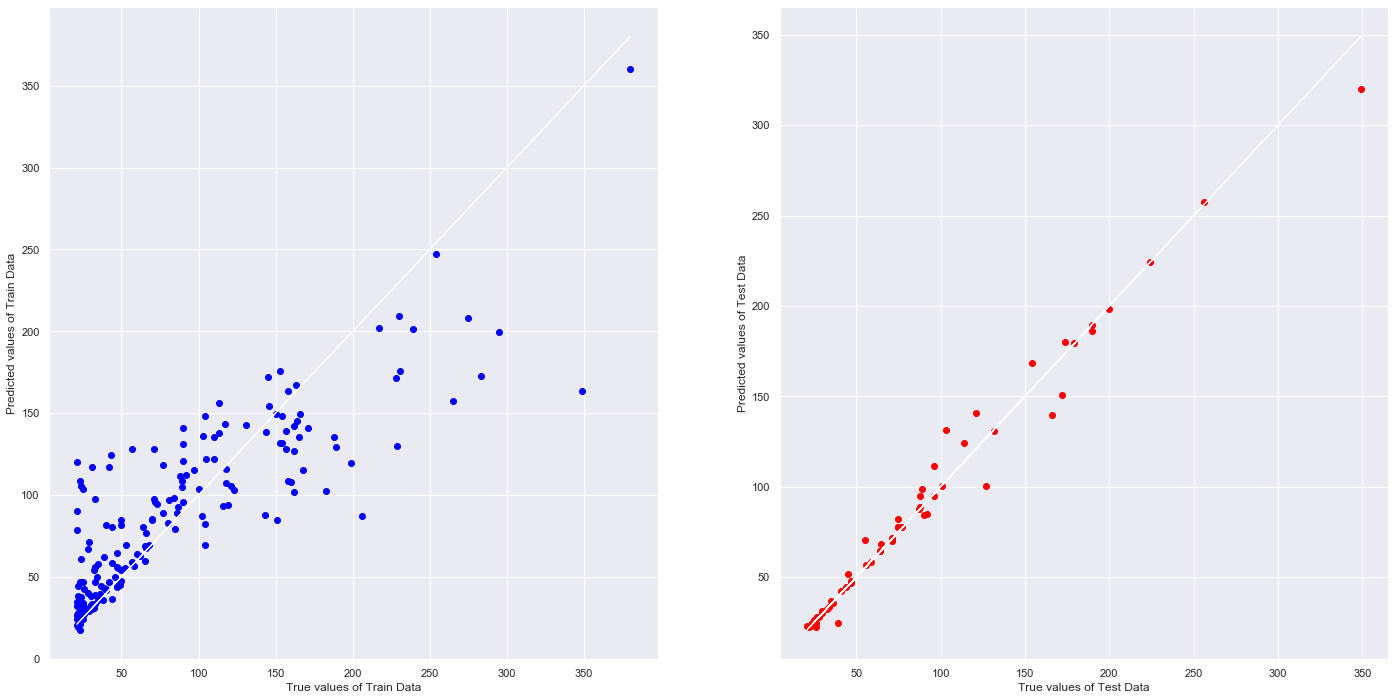

In [68]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(x = y_train, y = y_train_pred, color = 'blue')
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel(xlabel = 'True values of Train Data')
axes[0].set_ylabel(ylabel = 'Predicted values of Train Data')

axes[1].scatter(x = y_test, y = y_test_pred, color = 'red')
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel(xlabel = 'True values of Test Data')
axes[1].set_ylabel(ylabel = 'Predicted values of Test Data')

plt.show()

The model looks pretty good at predicting the number of fatalities above 20, given the variables. This means that the variables used are good predictors of the fatalities. The results from the train and test data are similar, which means this model is pretty reliable. We could improve the model if we had more 'good predictor' variables, such as the pilot's skill, experience and the number of passengers onboard.

---
# Is it type A or type B?

We will be making a model to predict if the accident is fatal or not.

### Classification Neural-Network using Keras

Import the following:
> `Sequential` model from `keras.models`  
> `Dense` from `keras.layers`  
> `confusion_matrix` from `sklearn.metrics` 
> `train_test_split` from `sklearn.model_selection`  

In [69]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Firsly, We do a one hot encoding for the Data

In [70]:
aviationData_onehot = pd.get_dummies(data = aviationData_clean_1982, columns = [i for i in aviationData_clean_1982 if hasattr(aviationData_clean_1982[i], 'cat')])._get_numeric_data()

Then we create a column which says whether the accident is fatal or not. 1 means fatal, 0 otherwise. We also remove the Latitude, Longitude and the injuries columns, and make 'Fatal' of integer type.

In [71]:
aviationData_onehot['Fatal'] = np.where(aviationData_onehot['Total.Fatal.Injuries'] > 0, '1', '0')
aviationData_onehot['Fatal'] = aviationData_onehot['Fatal'].astype(dtype = np.int64)

aviationData_onehot.drop(columns = injuries_columns, inplace = True)
aviationData_onehot.drop(columns = 'Injuries', inplace = True)
aviationData_onehot.drop(columns = ['Latitude', 'Longitude'], inplace = True)

These will be the variables we will be using to predict. 'Fatal' will be our response variable.

| Variables             | Observation      |    
| :-------------------: | :--------------: |    
| Investigation.Type    | Categorical      |   
| Aircraft.Damage       | Categorial       |
| Aircraft.Category     | Categorial       |   
| Amateur.Built         | Boolean          |   
| Number.of.Engines     | Numeric Variable |   
| Engine.Type           | Categorial       |   
| FAR.Description       | Categorial       |   
| Schedule              | Categorial       |    
| Purpose.of.Flight     | Categorial       |    
| Weather.Condition     | Categorial       |    
| Broad.Phase.of.Flight | Categorial       |    
| Report.Status         | Categorial       |     
| Year                  | Numeric Variable |    
| Month                 | Numeric Variable |    
| Date                  | Numeric Variable |

We take a look at the distribution using catplot.

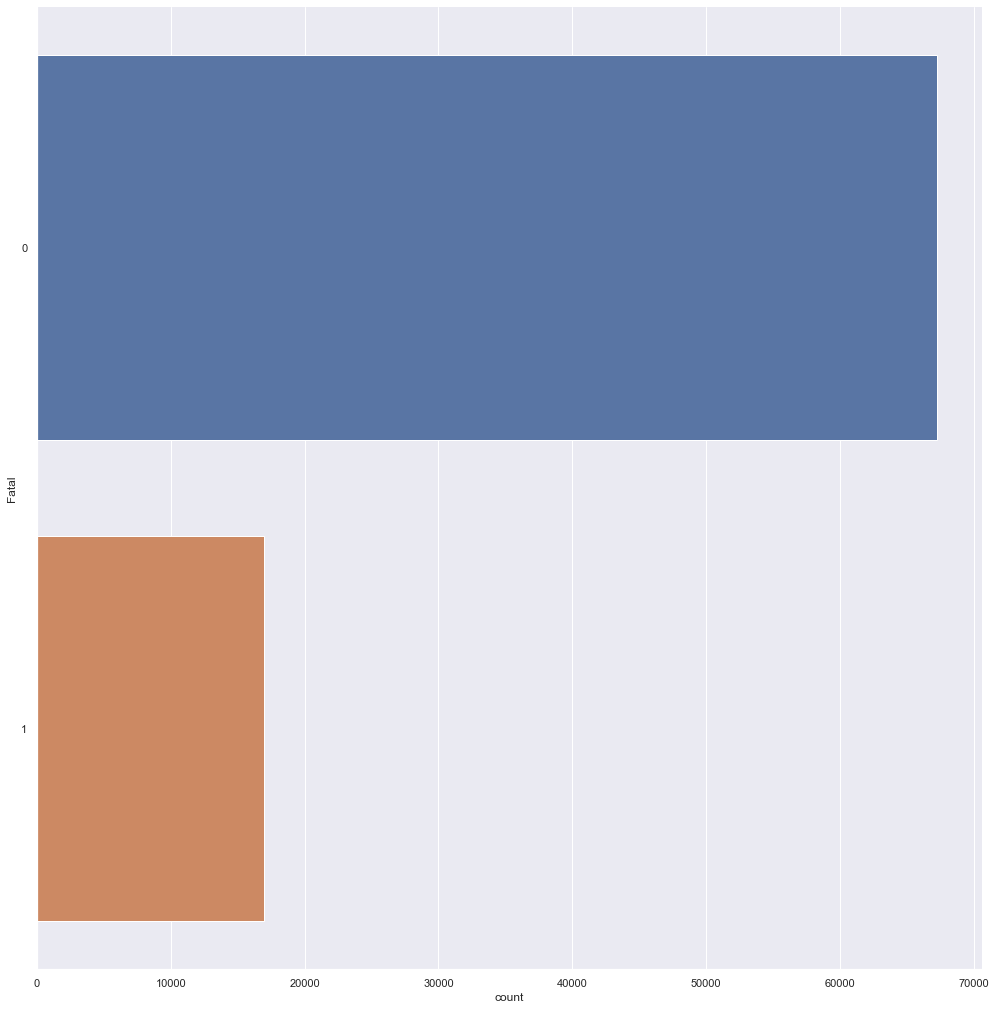

In [72]:
sb.catplot(y = 'Fatal', data = aviationData_onehot, kind = 'count', height = 14)

There is too much non-fatal accidents, which may skew our data. We are going to do under-sampling to balance the data. We take note of the number of fatal accidents, sample the same amount from non-fatal so we have a balanced data.

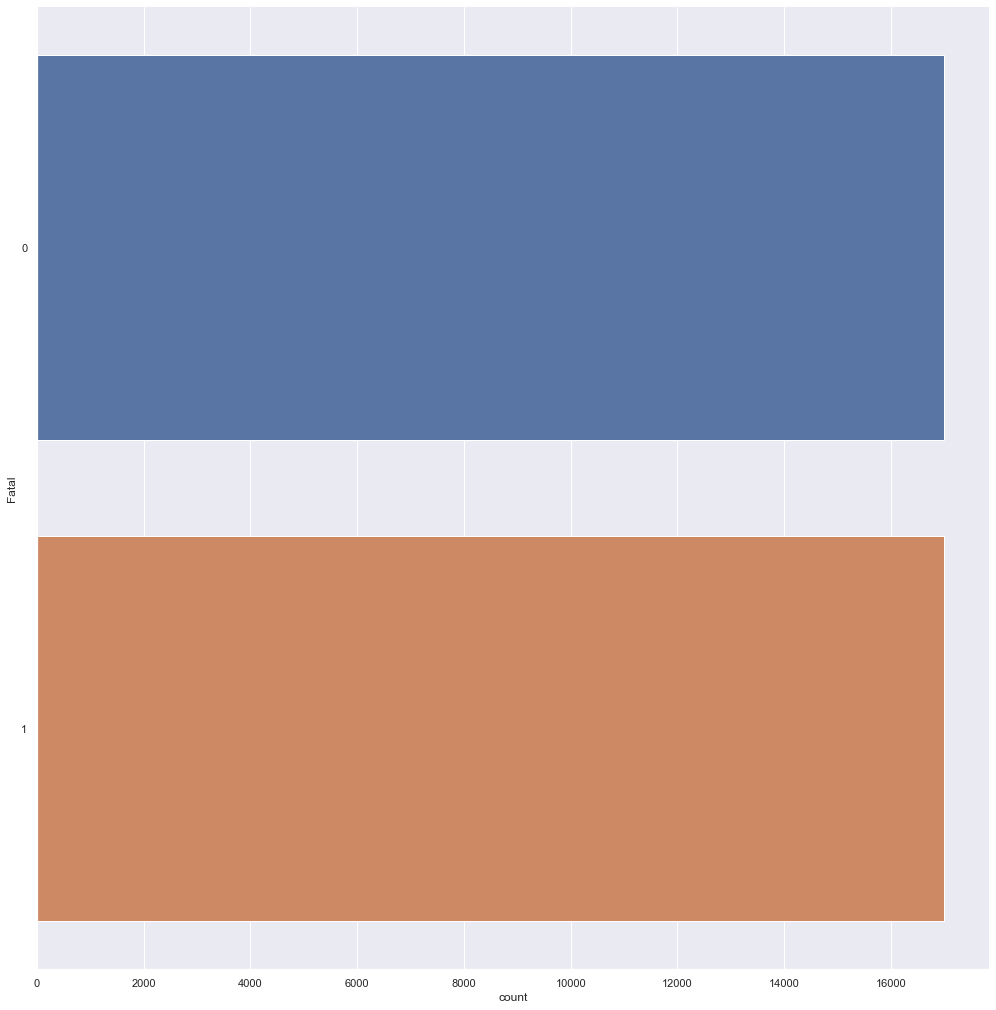

In [73]:
aviationData_onehot = pd.concat([aviationData_onehot[aviationData_onehot['Fatal'] == 0].sample(n = len(aviationData_onehot[aviationData_onehot['Fatal'] == 1])), aviationData_onehot[aviationData_onehot['Fatal'] == 1]])
aviationData_onehot.reset_index(drop = True, inplace = True)

sb.catplot(y = 'Fatal', data = aviationData_onehot, kind = 'count', height = 14)

We remove the latitude, longitude and injuries column, which may mess with the model.

In [74]:
X = aviationData_onehot.drop(columns = 'Fatal')
y = aviationData_onehot['Fatal']

Randomly split the Train Set and Test Set, with 25% of the data in the Test Set.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

We create the model, add layers and compile it.

In [76]:
model = Sequential()
model.add(layer = Dense(units = 100, input_dim = 100, activation = 'relu'))
model.add(layer = Dense(units = 50, activation = 'relu'))
model.add(layer = Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

We try to fit the model. This will take *very* long!

In [77]:
model.fit(x = X_train.values, y = y_train.values, epochs = 200, batch_size = 1)

Epoch 1/200
25486/25486 [==============================] - 16s 622us/step - loss: 1.4152 - accuracy: 0.7179
Epoch 2/200
25486/25486 [==============================] - 16s 627us/step - loss: 0.4408 - accuracy: 0.8089
Epoch 3/200
25486/25486 [==============================] - 16s 622us/step - loss: 0.4233 - accuracy: 0.8183
Epoch 4/200
25486/25486 [==============================] - 16s 622us/step - loss: 0.4110 - accuracy: 0.8272
Epoch 5/200
25486/25486 [==============================] - 16s 623us/step - loss: 0.4090 - accuracy: 0.8285
Epoch 6/200
25486/25486 [==============================] - 16s 619us/step - loss: 0.4041 - accuracy: 0.8289
Epoch 7/200
25486/25486 [==============================] - 16s 624us/step - loss: 0.4011 - accuracy: 0.8295
Epoch 8/200
25486/25486 [==============================] - 16s 643us/step - loss: 0.3971 - accuracy: 0.8338
Epoch 9/200
25486/25486 [==============================] - 16s 642us/step - loss: 0.3954 - accuracy: 0.8340
Epoch 10/200
25486/25486 [==

25486/25486 [==============================] - 17s 664us/step - loss: 0.3728 - accuracy: 0.8416
Epoch 150/200
25486/25486 [==============================] - 17s 670us/step - loss: 0.3727 - accuracy: 0.8428
Epoch 151/200
25486/25486 [==============================] - 18s 714us/step - loss: 0.3739 - accuracy: 0.8427
Epoch 152/200
25486/25486 [==============================] - 17s 685us/step - loss: 0.3730 - accuracy: 0.8432
Epoch 153/200
25486/25486 [==============================] - 18s 693us/step - loss: 0.3738 - accuracy: 0.8421
Epoch 154/200
25486/25486 [==============================] - 18s 702us/step - loss: 0.3733 - accuracy: 0.8418
Epoch 155/200
25486/25486 [==============================] - 19s 752us/step - loss: 0.3734 - accuracy: 0.8421
Epoch 156/200
25486/25486 [==============================] - 18s 709us/step - loss: 0.3731 - accuracy: 0.8424
Epoch 157/200
25486/25486 [==============================] - 20s 772us/step - loss: 0.3728 - accuracy: 0.8438
Epoch 158/200
25486/2548

Let's use the model to predict the train data.

In [78]:
y_train_pred = model.predict_classes(x = X_train)

Let's plot the confusion matrix!

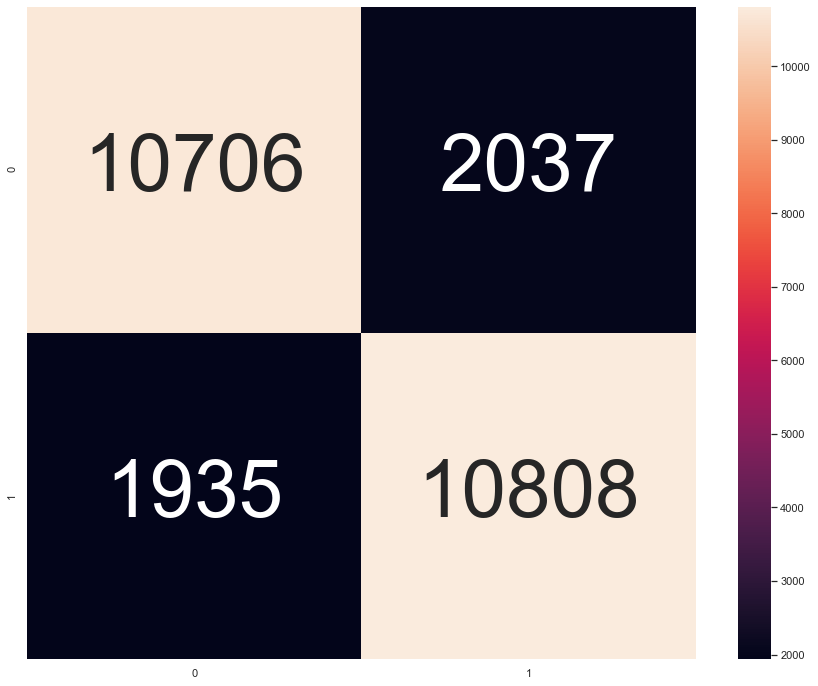

In [79]:
plt.figure(figsize = (15, 12))
sb.heatmap(confusion_matrix(y_true = y_train, y_pred = y_train_pred), annot = True, fmt = '.0f', annot_kws = {'size': 80})

We check the relevant rates and scores.

In [80]:
tn, fp, fn, tp = confusion_matrix(y_true = y_train, y_pred = y_train_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Classification Accuracy\t:', (tn + tp) / (tn + tp + fn + fp))
print('True Positive Rate \t:', tp / (tp + fn))
print('True Negative Rate \t:', tn / (tn + fp))
print('False Positive Rate \t:', fp / (tn + fp))
print('False Negative Rate \t:', fn / (tp + fn))
print('F1 Score\t\t:', 2 * precision * recall / (precision + recall))

Classification Accuracy	: 0.8441497292631248
True Positive Rate 	: 0.8481519265479086
True Negative Rate 	: 0.840147531978341
False Positive Rate 	: 0.15985246802165895
False Negative Rate 	: 0.15184807345209134
F1 Score		: 0.8447709863998749


Do the same for test data.

Classification Accuracy	: 0.838512241054614
True Positive Rate 	: 0.842984934086629
True Negative Rate 	: 0.8340395480225988
False Positive Rate 	: 0.16596045197740114
False Negative Rate 	: 0.157015065913371
F1 Score		: 0.8392313100539021


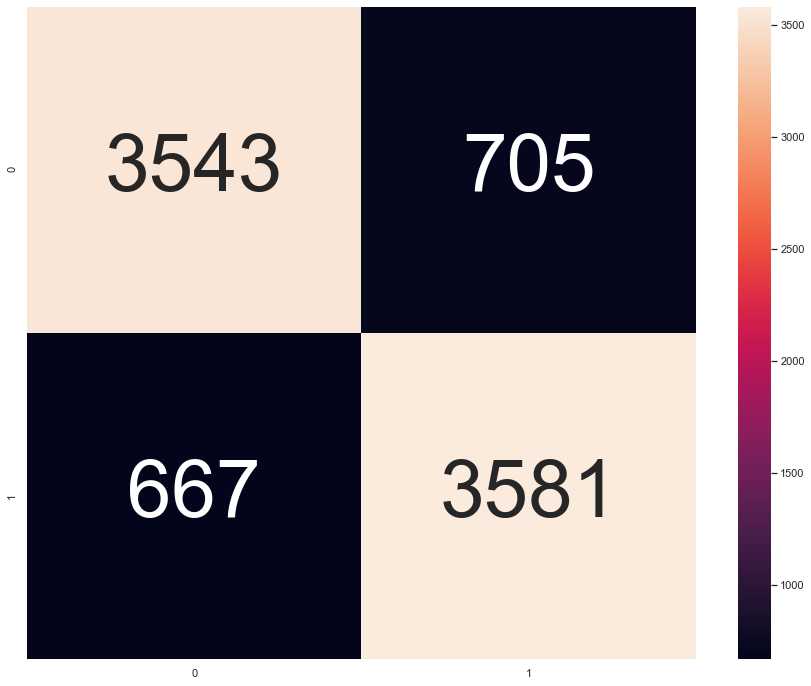

In [81]:
y_test_pred = model.predict_classes(x = X_test)

plt.figure(figsize = (15, 12))
sb.heatmap(confusion_matrix(y_true = y_test, y_pred = y_test_pred), annot = True, fmt = '.0f', annot_kws = {'size': 80})

tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_test_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Classification Accuracy\t:', (tn + tp) / (tn + tp + fn + fp))
print('True Positive Rate \t:', tp / (tp + fn))
print('True Negative Rate \t:', tn / (tn + fp))
print('False Positive Rate \t:', fp / (tn + fp))
print('False Negative Rate \t:', fn / (tp + fn))
print('F1 Score\t\t:', 2 * precision * recall / (precision + recall))

Promising results! The classification accuracy and F1 scores are pretty high, as well as the true positive and true negative rates. The false positive and false negative rates are low. Not only that, the scores for both train and test data are very close, meaning that we did not overfit one or another and it is a very reliable model.

---
# Is it type A or type B?

We will be making another model to predict if the accident is fatal or not.

### Classification using Decision Tree

Import the following:
> `DecisionTreeClassifier` from `sklearn.tree`  
> `export_graphviz` from `sklearn.tree`  
> `graphviz`  
> `confusion_matrix` from `sklearn.metrics`  
> `train_test_split` from `sklearn.model_selection`  

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Clean the data similar to above. Do one-hot encoding, drop the necessary columns and prepare the data set by doing a 25% test sample and 75% train sample. Also, balance the data by undersampling non-fatal accidents.

In [83]:
aviationData_onehot = pd.get_dummies(data = aviationData_clean_1982, columns = [i for i in aviationData_clean_1982 if hasattr(aviationData_clean_1982[i], 'cat')])._get_numeric_data()
aviationData_onehot['Fatal'] = np.where(aviationData_onehot['Total.Fatal.Injuries'] > 0, '1', '0')
aviationData_onehot['Fatal'] = aviationData_onehot['Fatal'].astype(dtype = np.int64)

aviationData_onehot.drop(columns = injuries_columns, inplace = True)
aviationData_onehot.drop(columns = 'Injuries', inplace = True)
aviationData_onehot.drop(columns = ['Latitude', 'Longitude'], inplace = True)

aviationData_onehot = pd.concat([aviationData_onehot[aviationData_onehot['Fatal'] == 0].sample(n = len(aviationData_onehot[aviationData_onehot['Fatal'] == 1])), aviationData_onehot[aviationData_onehot['Fatal'] == 1]])

X = aviationData_onehot.drop(columns = 'Fatal')
y = aviationData_onehot['Fatal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Fit the decision tree and draw it out.

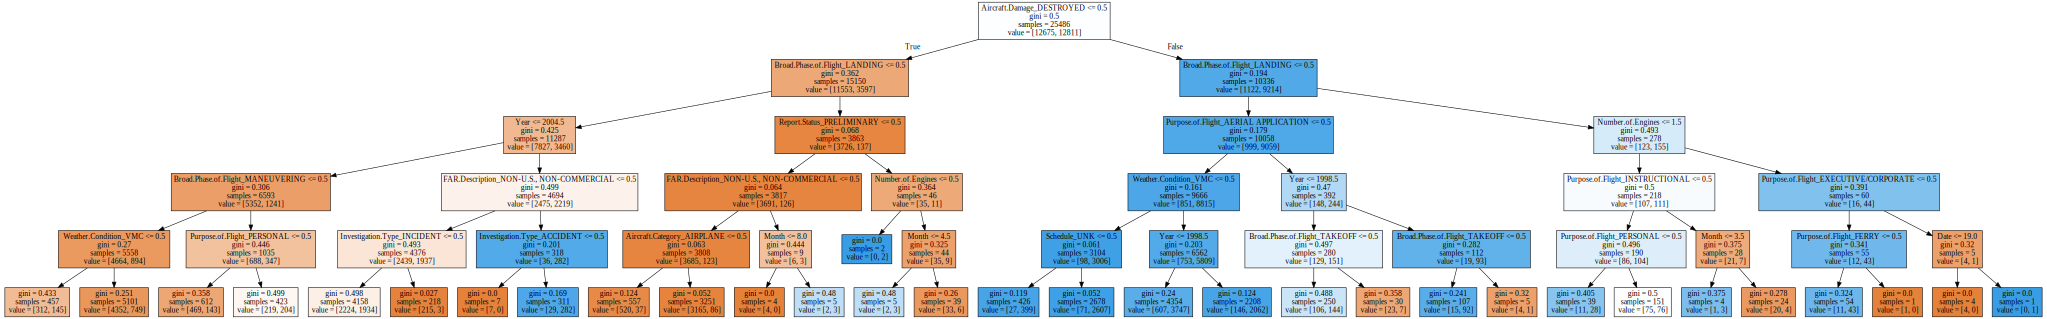

In [84]:
dectree = DecisionTreeClassifier(max_depth = 5)
dectree.fit(X = X_train, y = y_train)

treedot = export_graphviz(decision_tree = dectree, feature_names = X_train.columns, filled = True)
graphviz.Source(source = treedot)

Plot the confusion matrix for training data and print the relevant scores.

Classification Accuracy	: 0.8264929765361375
True Positive Rate 	: 0.740925766919054
True Negative Rate 	: 0.9129783037475345
False Positive Rate 	: 0.08702169625246549
False Negative Rate 	: 0.25907423308094607
F1 Score		: 0.8110740835683158


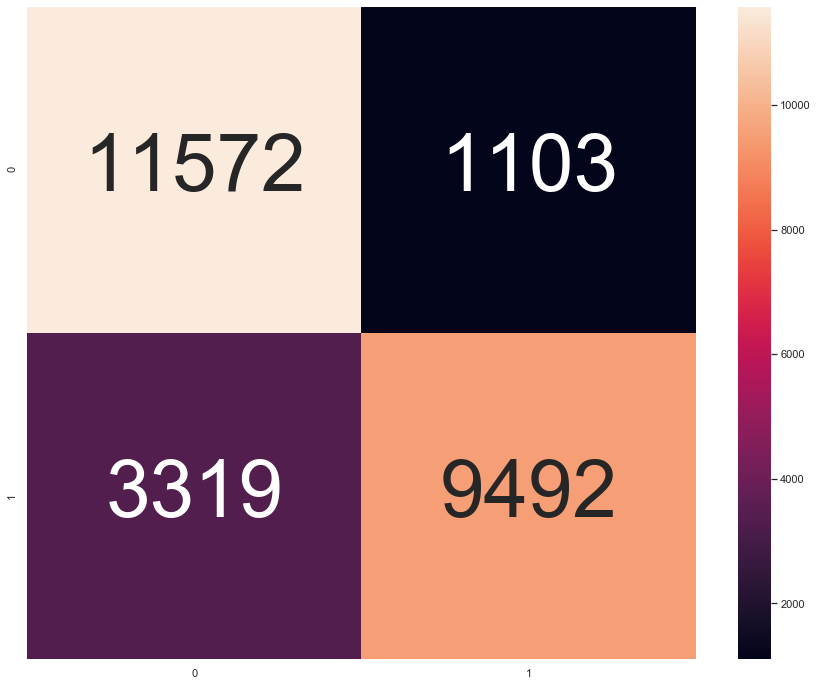

In [85]:
y_train_pred = dectree.predict(X = X_train)

plt.figure(figsize = (15, 12))
sb.heatmap(confusion_matrix(y_true = y_train, y_pred = y_train_pred), annot = True, fmt = '.0f', annot_kws = {'size': 80})

tn, fp, fn, tp = confusion_matrix(y_true = y_train, y_pred = y_train_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Classification Accuracy\t:', (tn + tp) / (tn + tp + fn + fp))
print('True Positive Rate \t:', tp / (tp + fn))
print('True Negative Rate \t:', tn / (tn + fp))
print('False Positive Rate \t:', fp / (tn + fp))
print('False Negative Rate \t:', fn / (tp + fn))
print('F1 Score\t\t:', 2 * precision * recall / (precision + recall))

Do the same for test data.

Classification Accuracy	: 0.8221516007532956
True Positive Rate 	: 0.7284688995215312
True Negative Rate 	: 0.9128822984244671
False Positive Rate 	: 0.0871177015755329
False Negative Rate 	: 0.2715311004784689
F1 Score		: 0.8012103670569662


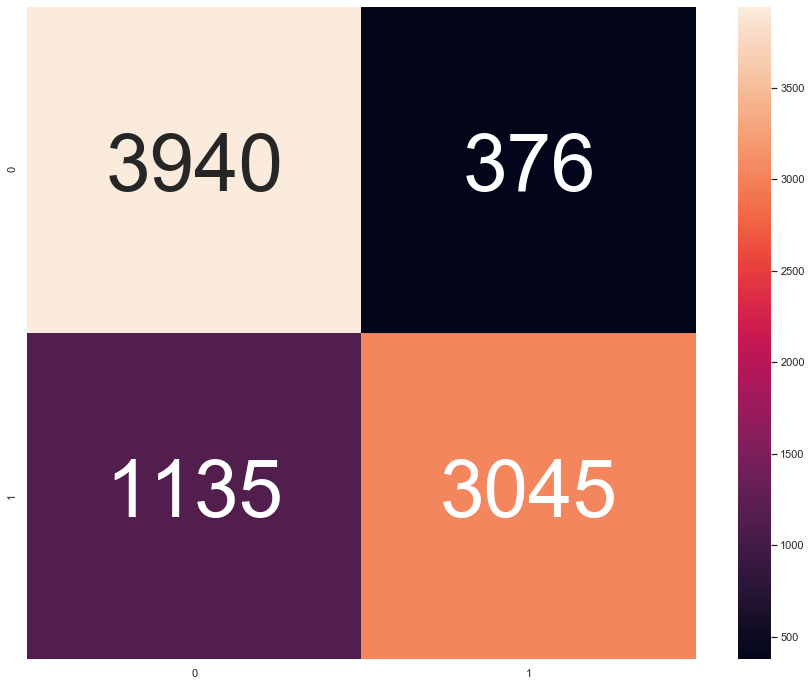

In [86]:
y_test_pred = dectree.predict(X = X_test)

plt.figure(figsize = (15, 12))
sb.heatmap(confusion_matrix(y_true = y_test, y_pred = y_test_pred), annot = True, fmt = '.0f', annot_kws = {'size': 80})

tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_test_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Classification Accuracy\t:', (tn + tp) / (tn + tp + fn + fp))
print('True Positive Rate \t:', tp / (tp + fn))
print('True Negative Rate \t:', tn / (tn + fp))
print('False Positive Rate \t:', fp / (tn + fp))
print('False Negative Rate \t:', fn / (tp + fn))
print('F1 Score\t\t:', 2 * precision * recall / (precision + recall))

We get slightly better results using keras, as I have only used max depth of 5. This is because we do not want to overfit the data the data.

---
# How is this organized?

We will do clustering of longitude and latitude to see if there are any patterns.

### Clustering using DBSCAN

Import the following:
> `DBSCAN` model from `sklearn.cluster`  

In [87]:
from sklearn.cluster import DBSCAN

Firstly, we drop the null values.

In [88]:
X = aviationData_clean_1982[['Longitude' , 'Latitude']].dropna()

We set up the model and then fit and predict the data.

In [89]:
dbscan = DBSCAN(eps = 5)
labels = dbscan.fit_predict(X = X)

We do a scatterplot to see how the clusters are.

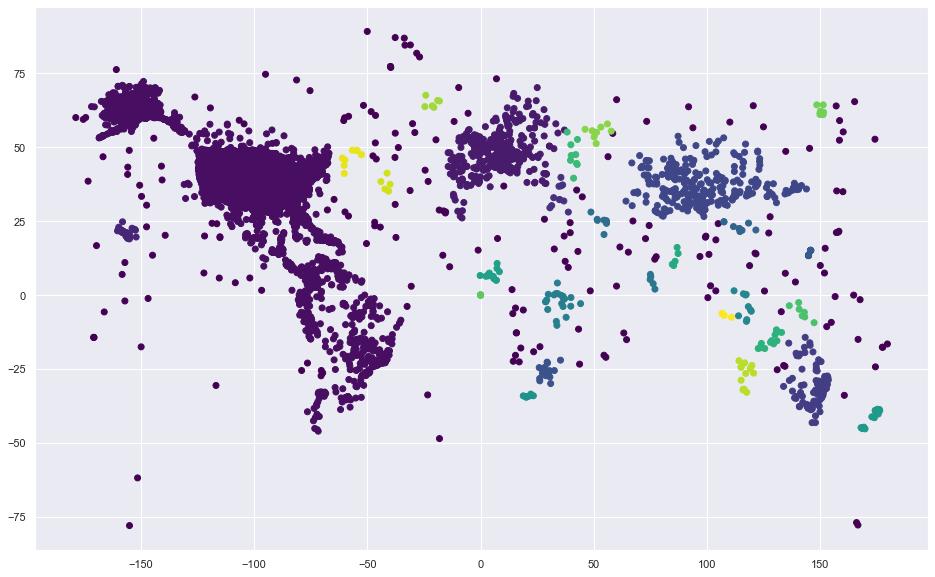

In [90]:
X_labeled = X.copy()
X_labeled['Cluster'] = pd.Categorical(values = labels)

f, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 10))
plt.scatter(x = 'Longitude', y = 'Latitude', c = 'Cluster', cmap = 'viridis', data = X_labeled)

It seems that the Americas are in one cluster, Europe is one cluster, China and perhaps Russia is one cluster, and the rest are made up of smaller clusters.

---
# Is it weird behavior?

We will do anomaly detection of longitude and latitude to see if there are any weird behaviours.

### Anomaly Detection using IsolationForest

Import the following:
> `IsolationForest` model from `sklearn.ensemble`  

In [91]:
from sklearn.ensemble import IsolationForest

Firstly, we drop the null values.

In [92]:
X = aviationData_clean_1982[['Longitude' , 'Latitude']].dropna()

We set up the model and then fit and predict the data.

In [93]:
clf = IsolationForest()
labels = clf.fit_predict(X = X)

We do a scatterplot to see how the clusters are.

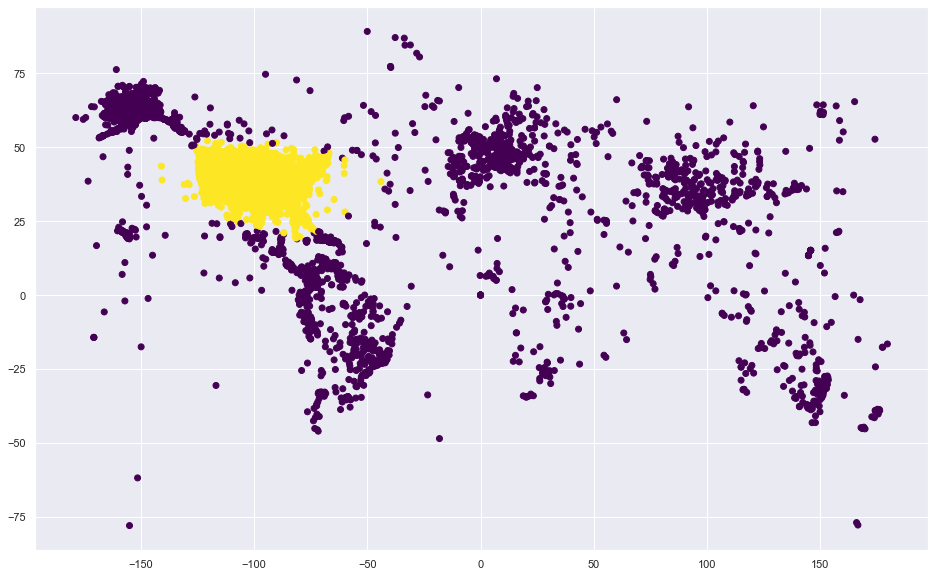

In [94]:
X_labeled = X.copy()
X_labeled['Anomaly'] = pd.Categorical(values = labels)

f, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 10))
plt.scatter(x = 'Longitude', y = 'Latitude', c = 'Anomaly', cmap = 'viridis', data = X_labeled)

Because of how much data is based in the United States, anything outside the United States is an anomaly...

# Graphically/CPU Demanding Items
## Bubble Map
Import the following:
> `go` from `plotly.graph_objects` 

In [ ]:
import plotly.graph_objects as go

We set an empty figure and set colours to location rank. We also sort the dataset.

In [ ]:
fig = go.Figure()

limits = [(1, 3000), (3001, 6000), (6001, 9000), (9001, 12000), (12001, 15000)]
colours = ['crimson', 'orange', 'gold', 'royalblue', 'lightseagreen']

sortdf = aviationData_clean.sort_values(by = 'Injuries' ,ascending = False)

'Plot' the bubble map. This may cause lag the enitre notebook!

In [ ]:
for i in range(len(limits)):
    lim = limits[i]
    df_sub = sortdf[lim[0]: lim[1]]
    fig.add_trace(go.Scattergeo(locationmode = 'country names', lon = df_sub['Longitude'], lat = df_sub['Latitude'], text = df_sub['Location'],
        marker = dict(size = df_sub['Injuries'] * 10, color = colours[i], line_color = 'rgb(40,40,40)', line_width = 0.5, sizemode = 'area'),
        name = 'Rank: {0}-{1}'.format(lim[0], lim[1])))

fig.update_layout(title_text = 'Number of Injuries - Bubble Map<br>(Click legend to toggle traces)', showlegend = True,
        geo = dict(scope = 'world', landcolor = 'rgb(217, 217, 217)'))

fig.show()

Since most accidents happened in the United States, we will do a deep down analysis for US.

We do the same analysis as above, but just for US.

In [ ]:
usfig = go.Figure()

limits = [(1, 3000), (3001, 6000), (6001, 9000), (9001, 12000), (12001, 15000)]
colours = ['crimson', 'orange', 'gold', 'royalblue', 'lightseagreen']
for i in range(len(limits)):
    lim = limits[i]
    df_sub = sortdf[lim[0]: lim[1]]
    usfig.add_trace(go.Scattergeo(locationmode = 'USA-states', lon = df_sub['Longitude'], lat = df_sub['Latitude'], text = df_sub['Location'],
        marker = dict(size = df_sub['Injuries'] * 10, color = colours[i], line_color = 'rgb(40,40,40)', line_width = 0.5, sizemode = 'area'),
        name = 'Rank: {0}-{1}'.format(lim[0], lim[1])))

usfig.update_layout(title_text = 'Number of Injuries in US - Bubble Map<br>(Click legend to toggle traces)', showlegend = True,
        geo = dict(scope = 'usa', landcolor = 'rgb(217, 217, 217)'))

usfig.show()

## Animated Map
Import the following:
> `iplot` from `plotly.offline` 

In [ ]:
from plotly.offline import iplot

We get the required columns for the map.

In [ ]:
damageData = aviationData_clean_1982.iloc[:, 4: 13]
damageData['Injuries'] = aviationData_clean_1982['Injuries']
damageData['Year'] = aviationData_clean_1982['Year']

We then group data based on longitude.

In [ ]:
groupLon = damageData
groupLon['NewIndex'] = damageData['Longitude']
groupLon = groupLon.groupby(by = 'NewIndex').first()
groupLon = groupLon.sort_values(by = 'Year')

We get the unique years.

In [ ]:
years = [str(each) for each in list(groupLon['Year'].unique())]

We create a list of aircraft damages and associate them with colour.

In [ ]:
types = ['Substantial', 'Destroyed', 'Minor']
custom_colors = {'Substantial': 'rgb(0,128,128)', 'Destroyed': 'rgb(153,0,0)', 'Minor': 'rgb(0, 0, 128)'}

Then we plot it.

In [ ]:
figure = {'data': [], 'layout': {}, 'frames': []}
figure['layout']['geo'] = dict(showframe = False, showland = True, showcoastlines = True, showcountries = True, countrywidth = 1, landcolor = 'rgb(217, 217, 217)', subunitwidth = 1, showlakes = True, lakecolor = 'rgb(255, 255, 255)', countrycolor = 'rgb(5, 5, 5)')
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {'args': ['transition', {'duration': 400, 'easing': 'cubic-in-out'}], 'initialValue': '1982', 'plotlycommand': 'animate', 'values': years, 'visible': True}
figure['layout']['updatemenus'] = [{'buttons': [{'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}], 'label': 'Play', 'method': 'animate'}, 
                                                {'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}], 'label': 'Pause', 'method': 'animate'}],
                                    'direction': 'left', 'pad': {'r': 10, 't': 87}, 'showactive': False, 'type': 'buttons', 'x': 0.1, 'xanchor': 'right', 'y': 0, 'yanchor': 'top'}]

sliders_dict = {'active': 0, 'yanchor': 'top', 'xanchor': 'left', 'currentvalue': {'font': {'size': 20}, 'prefix': 'Year:', 'visible': True, 'xanchor': 'right'}, 'transition': {'duration': 300, 'easing': 'cubic-in-out'}, 'pad': {'b': 10, 't': 50}, 'len': 0.9, 'x': 0.1, 'y': 0, 'steps': []}

year = 1982
for ty in types:
    dataset_by_year = groupLon[groupLon['Year'] == year]
    dataset_by_year_and_cont = dataset_by_year[dataset_by_year['Aircraft.Damage'] == ty]
    
    data_dict = dict(type = 'scattergeo', lon = groupLon['Longitude'], lat = groupLon['Latitude'], hoverinfo = 'text', text = ty, mode = 'markers', marker = dict(sizemode = 'area', sizeref = 1, size = 10, line = dict(width = 1,color = 'white'), color = custom_colors[ty], opacity = 0.7))
    figure['data'].append(data_dict)

for year in years:
    frame = {'data': [], 'name': str(year)}
    for ty in types:
        dataset_by_year = groupLon[groupLon['Year'] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[dataset_by_year['Aircraft.Damage'] == ty]

        data_dict = dict(type='scattergeo', lon = dataset_by_year_and_cont['Longitude'], lat = dataset_by_year_and_cont['Latitude'], hoverinfo = 'text', text = ty, mode = 'markers', marker = dict(sizemode = 'area', sizeref = 1, size = 10, line = dict(width = 1,color = 'white'), color = custom_colors[ty], opacity = 0.7), name = ty)
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [[year], {'frame': {'duration': 300, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 300}}], 'label': year, 'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

figure['layout']['autosize'] = True
figure['layout']['title'] = 'Number of Aviation Accidents per Year'       

figure['layout']['sliders'] = [sliders_dict]

iplot(figure)